# **Problem statement**

---
Walmart wants to find out if women spend more money than men on Black Friday by comparing the purchase amounts of male and female customers.

If Walmart finds that, Women spend more on certain product types and men prefer certain categories or spend less overall.

Accordingly they can use this insight to optimize marketing, personalize offers,improve product stocking.

In [3]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O Walmart_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/Walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 51.0MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Walmart_data.csv')
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

# **Q1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.**

**i) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary**

**Basic Data Analysis**

**Shape**

In [6]:
df.shape

(550068, 10)

**Information about data structure**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Unique value counts**

In [8]:
for i in df.columns:
  print(i, ':', df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


**Observation:**

From above I am concluding that only **Purchase is continuous** column **remaining are catgorical columns**. User_ID, Product_ID might look continuous columns but in reality unique identifier and product lable respectively, I can't perform mathematical operations with this values. Therfore I am considering this columns as categorical columns.




**Describe Dataframe in terms of mean, max, min, 25%, 50% and 75%**

**Note:** Focusing solely on the Purchase column here, since it’s the only continuous variable.

If categorical columns contain string labels, .describe() can still show count, unique, top, freq, which is useful.

But if the categorical data is masked or encoded as numbers (like 1 for male, 2 for female), then .describe() might look numeric but actually lack real statistical meaning.

In [9]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

**Obervation:**

Most customers spend between ₹5,800 and ₹12,000.

Most customers spend a moderate amount, close to the average of ₹9,263.97, while a few customers spend significantly more, with the maximum purchase reaching ₹23,961, which is much higher than rest of the customers.

This variation can be useful for customer segmentation.

In [10]:
df.describe(include = "O")

Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     550068
unique       3631       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1880  414259  219587        231173                     193821

In [11]:
df[df.duplicated()] # No duplicate records

Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase]
Index: []

**Missing Value Detection**

In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Observation:**

There are no missing or null (NaN) values in the dataset, as all columns have a count of zero nulls.

**ii) Non-Graphical Analysis: Value counts and unique attributes**

In [13]:
display(df[['Gender']].value_counts(normalize = True).reset_index().T)
print(f"Unique values in Gender: {df['Gender'].nunique()}")

0         1
Gender             M         F
proportion  0.753105  0.246895

Unique values in Gender: 2


*  Around 75% of the customers are male and 25% are female.
*  Since there's a significant gender imbalance, Walmart should analyzing if this is due to data collection bias or a real customer trend.

In [14]:
display(df['Age'].value_counts(normalize= True).reset_index().T)
print(f"Unique values in Age: {df['Age'].nunique()}")

0         1         2         3         4         5         6
Age          26-35     36-45     18-25     46-50     51-55       55+      0-17
proportion  0.3992  0.199999  0.181178  0.083082  0.069993  0.039093  0.027455

Unique values in Age: 7


*   Around 40% customers belongs to age group 26-35.
*   The next largest groups are- 36–45 years (20%), 18–25 years (18%)
*   Older age groups (46+) and very young customers (0–17) make up smaller portions of the customer base.

In [15]:
display(df['Occupation'].value_counts(normalize= True).reset_index().T)
print(f"Unique values in Occupation: {df['Occupation'].nunique()}")

0         1         2         3          4          5   \
Occupation  4.000000  0.000000  7.000000  1.000000  17.000000  20.000000   
proportion  0.131453  0.126599  0.107501  0.086218   0.072796   0.061014   

                   6          7         8          9   ...        11  \
Occupation  12.000000  14.000000  2.000000  16.000000  ...  3.000000   
proportion   0.056682   0.049647  0.048336   0.046123  ...  0.032087   

                   12        13         14         15         16         17  \
Occupation  10.000000  5.000000  15.000000  11.000000  19.000000  13.000000   
proportion   0.023506  0.022137   0.022115   0.021063   0.015382   0.014049   

                   18        19        20  
Occupation  18.000000  9.000000  8.000000  
proportion   0.012039  0.011437  0.002811  

[2 rows x 21 columns]

Unique values in Occupation: 21


*  There are 21 different occupation categories in the data.

*  The top 3 occupations IDs: 4, 0, and 7 make up the largest customer segments with 13.1%, 12.7% and 10.8% respectively.
*  The least represented occupation (ID: 8) has only ~0.28% of customers.

In [16]:
display(df['City_Category'].value_counts(normalize= True).reset_index().T)
print(f"Unique values in City_Category: {df['City_Category'].nunique()}")

0         1         2
City_Category         B         C         A
proportion     0.420263  0.311189  0.268549

Unique values in City_Category: 3


*  City B has the highest number of customers (about 42%).

*  City C comes next with around 31%.

*  City A has the least, with about 27%.

In [17]:
display(df['Stay_In_Current_City_Years'].value_counts(normalize= True).reset_index().T)
print(f"Unique values in Stay_In_Current_City_Years: {df['Stay_In_Current_City_Years'].nunique()}")

0         1         2         3         4
Stay_In_Current_City_Years         1         2         3        4+         0
proportion                  0.352358  0.185137  0.173224  0.154028  0.135252

Unique values in Stay_In_Current_City_Years: 5


*  The highest number of customers (about 35%) have been in their current city for 1 year.

*  About 18.5% have stayed for 2 years, and 17.3% for 3 years.

*  Around 15% have stayed for 4+ years, and the smallest group (13.5%) are new.

In [18]:
display(df['Marital_Status'].value_counts(normalize= True).reset_index().T)
print(f"Unique values in Marital_Status: {df['Marital_Status'].nunique()}")

0         1
Marital_Status  0.000000  1.000000
proportion      0.590347  0.409653

Unique values in Marital_Status: 2


*  Around 59% of the customers are unmarried (Marital_Status = 0).

*  About 41% are married (Marital_Status = 1).


In [19]:
display(df['Product_Category'].value_counts(normalize= True).reset_index().T)
print(f"Unique values in Product_Category: {df['Product_Category'].nunique()}")

0         1         2          3         4         5   \
Product_Category  5.00000  1.000000  8.000000  11.000000  2.000000  6.000000   
proportion        0.27439  0.255201  0.207111   0.044153  0.043384  0.037206   

                        6         7          8          9          10  \
Product_Category  3.000000  4.000000  16.000000  15.000000  13.000000   
proportion        0.036746  0.021366   0.017867   0.011435   0.010088   

                         11         12        13         14         15  \
Product_Category  10.000000  12.000000  7.000000  18.000000  20.000000   
proportion         0.009317   0.007175  0.006765   0.005681   0.004636   

                         16         17         18        19  
Product_Category  19.000000  14.000000  17.000000  9.000000  
proportion         0.002914   0.002769   0.001051  0.000745

Unique values in Product_Category: 20


*  The top 3 product categories are:

    * Category 5: ~27.4% of purchases

    * Category 1: ~25.5%

    * Category 8: ~20.7%

* Together, these three categories make up over 73% of all purchases, showing they are the most popular among customers.

* Categories like 17, 18, 19, and 20 have very low purchase proportions (less than 1%), meaning they are less popular or niche items.*

**iii) Visual Analysis - Univariate & Bivariate**

**a)For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

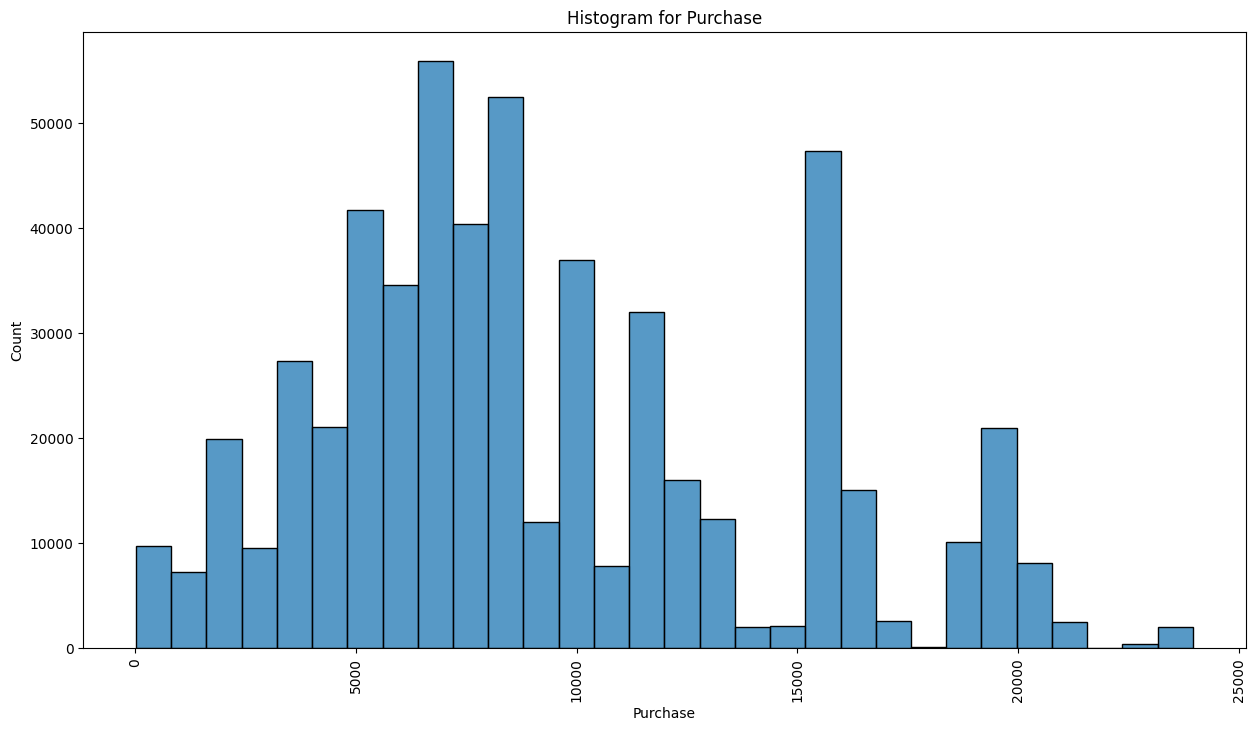

In [20]:
plt.figure(figsize=(15,8))
plt.title("Histogram for Purchase")
sns.histplot(x='Purchase',data=df, bins=30)
plt.xticks(rotation=90)

plt.show()

**Observations:**



*   Most customers tend to spend between ₹5,000 and ₹10,000, which could represent popular price bands or commonly bought items.
*  Some tall bars appear again around ₹15,000, ₹20,000, etc., which means that many people are spending exactly these amounts. This could be because the product prices are fixed at certain levels or there are discounts or offers set at those amounts.
* Zero or low purchase counts for certain purchase amount.
* The histogram is not smooth and shows multiple spikes or peaks, which suggests that the purchase amounts are not normally spread.



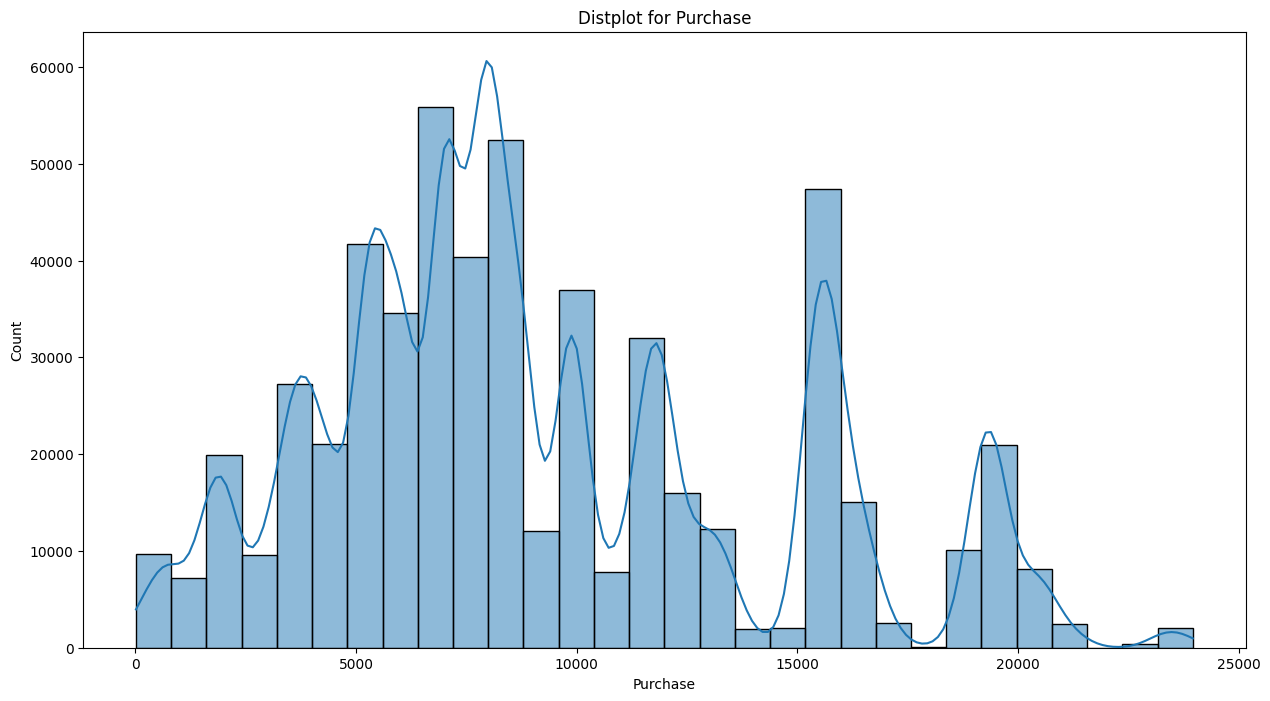

In [21]:
plt.figure(figsize=(15,8))
plt.title("Distplot for Purchase")
sns.histplot(x='Purchase',data=df, kde=True, bins=30)

plt.show()

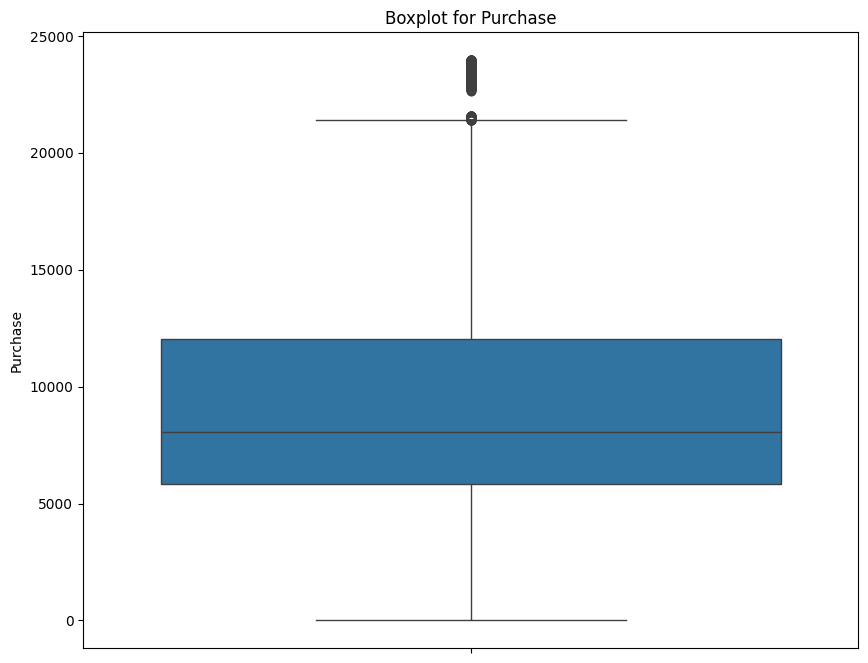

In [22]:
plt.figure(figsize = (10,8))
plt.title("Boxplot for Purchase")
sns.boxplot(y = df['Purchase'], data = df)
plt.show()

In [23]:
q1 = df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
IQR = q3 - q1
print(f"IQR: {IQR}")

Q1 (25th percentile): 5823.0
Q3 (75th percentile): 12054.0
IQR: 6231.0


**Observation:**


*   The bold line inside box of box plot represents median which is around **8000**, indicates 50% purchase values are below this amount.
*   Box represents the middle 50% of data, from 25th percentile (approx. to **5823**) to 75th percentile (approx. to **12054**) and IQR is **6231**.



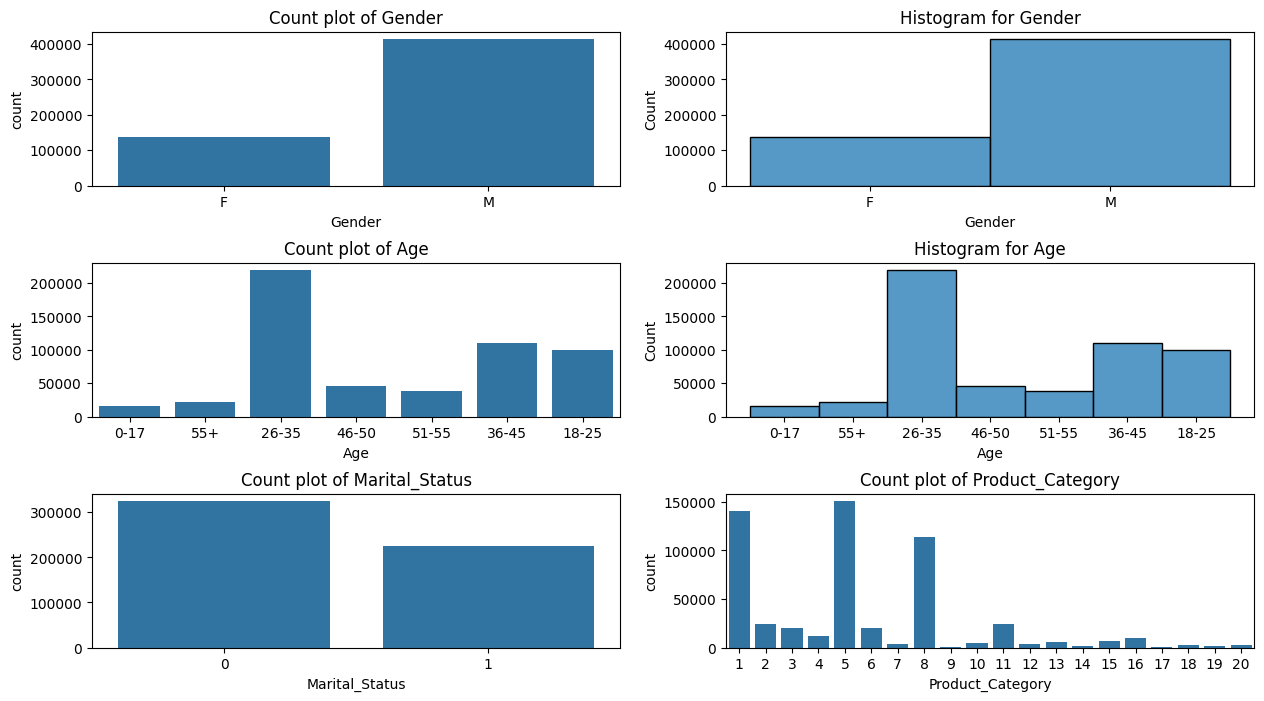

In [24]:
plt.figure(figsize=(15,8))

plt.subplot(3, 2, 1)
plt.title("Count plot of Gender")
sns.countplot(x=df['Gender'], data=df)

plt.subplot(3, 2, 2)
plt.title("Histogram for Gender")
sns.histplot(x='Gender',data=df)


plt.subplot(3, 2, 3)
plt.title("Count plot of Age")
sns.countplot(x=df['Age'], data=df)


plt.subplot(3, 2, 4)
plt.title("Histogram for Age")
sns.histplot(x='Age',data=df)


plt.subplot(3, 2, 5)
plt.title("Count plot of Marital_Status")
sns.countplot(x=df['Marital_Status'], data=df)

plt.subplot(3, 2, 6)
plt.title("Count plot of Product_Category")
sns.countplot(x=df['Product_Category'], data=df)

plt.subplots_adjust(hspace=0.5)
plt.show()

**Observations:**


*  There are significantly more male customers than female customers in the dataset.
*  Age grp 26-35 dominates other age groups followed by 36-45 and 18-25 age group.
*  This means most active purchasing group is of young adults, mostly in the 26–35 age range and the least active age group is 0-17 and 55+.
*  Unmarried customer significantly purchasing hight than married.
*  Product Categories 1, 5, and 8 are the most purchased and some categories (like 19 and 20) are rarely bought.




**b) For categorical variable(s): Boxplot**

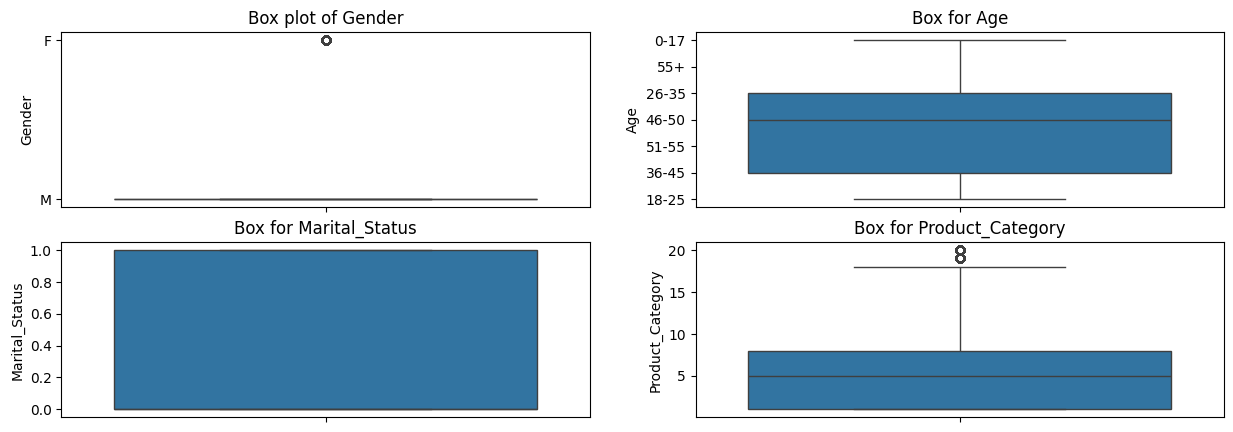

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(2, 2, 1)
plt.title("Box plot of Gender")
sns.boxplot(y=df['Gender'], data=df)

plt.subplot(2, 2, 2)
plt.title("Box for Age")
sns.boxplot(y='Age',data=df)

plt.subplot(2, 2, 3)
plt.title("Box for Marital_Status")
sns.boxplot(y='Marital_Status',data=df)

plt.subplot(2, 2, 4)
plt.title("Box for Product_Category")
sns.boxplot(y='Product_Category',data=df)

plt.show()

**Observations:**


*   Box plots are best suited for numerical data. When applied to categorical data like gender and age, they may not give statistically meaningful percentiles but still indicate skewed distribution.
*   Female is shown as outlier bcause the count is much lower than male customers and male shows high frequency.
*   The age group '46-50' lies at the median (50th percentile), the 25th percentile (Q1) is around '36-45', and the 75th percentile (Q3) is around '26-35'.
*   The whiskers extend from '18-25' (min) to '0-17' (max), so no outliers here.
*   It’s a binary variable (0 = Unmarried, 1 = Married). The box covers both 0 and 1, showing a fairly even distribution. No outliers, just two distinct groups.
*   Most purchases are made in the lower product category numbers (1 to 8).
*   There are clear outliers in the higher category range (like 18, 19, 20), indicating these are rarely purchased.


**Bivariate**

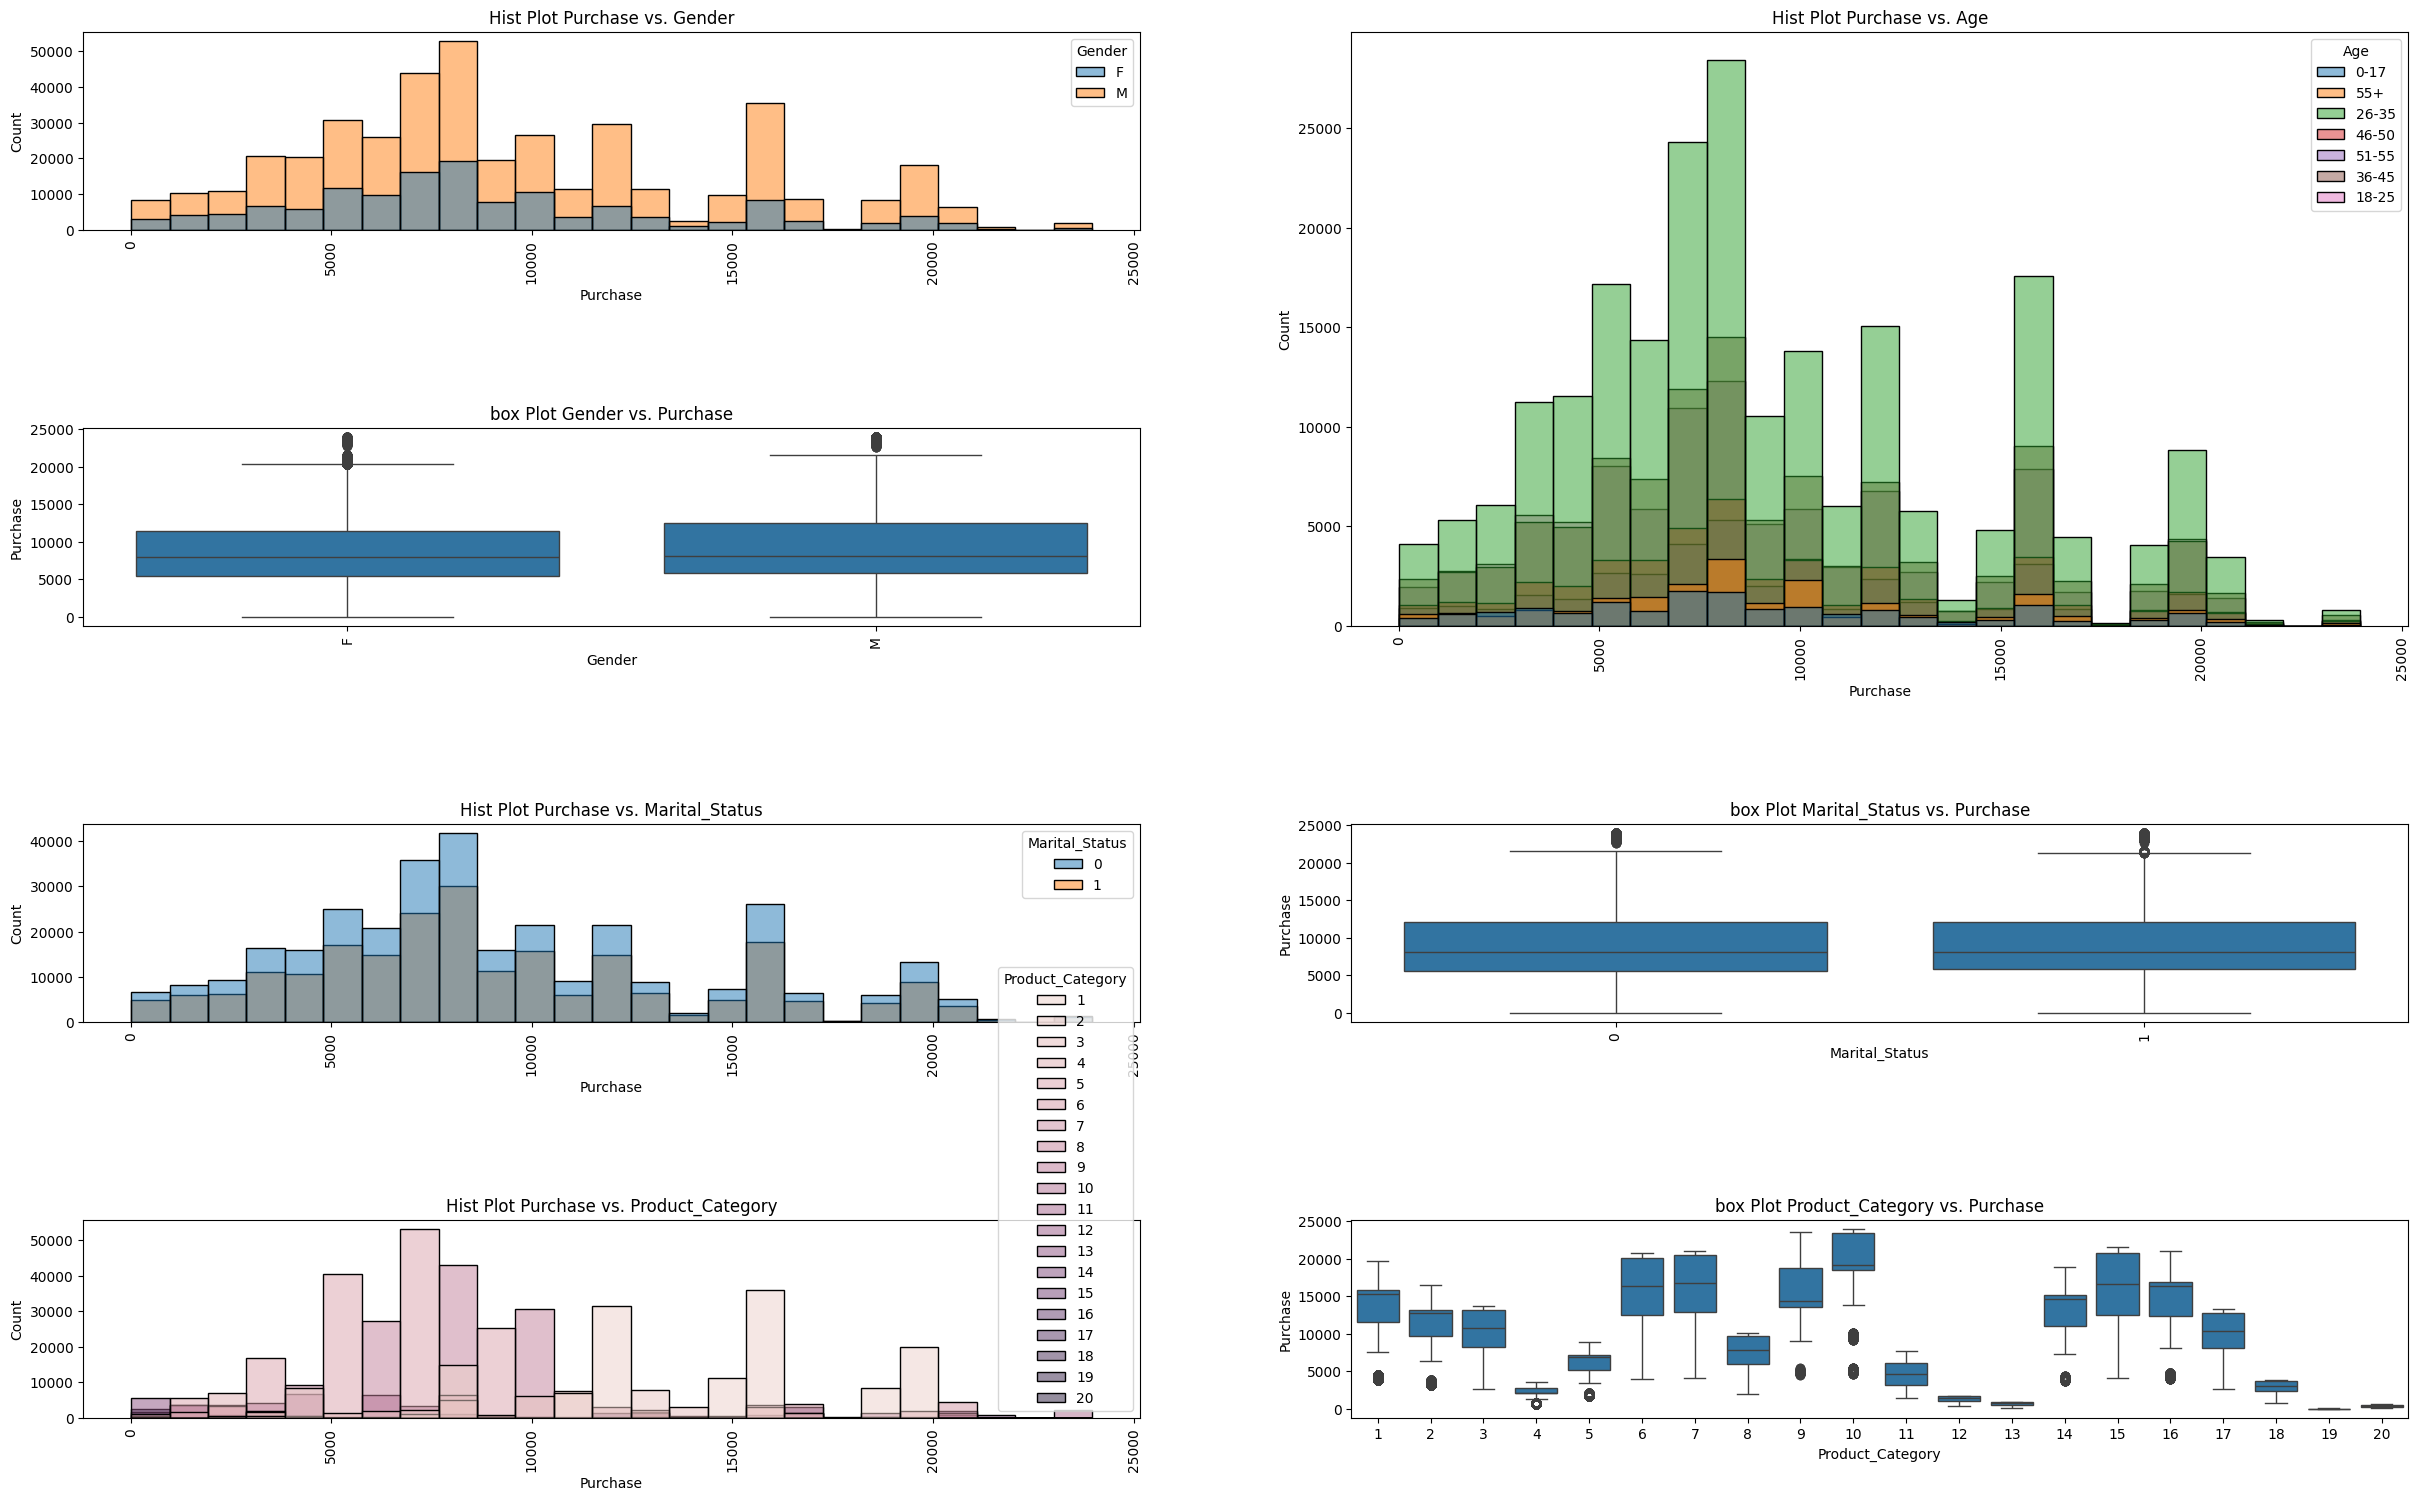

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(30,18))
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1])

ax1 = plt.subplot(gs[0, 0])
sns.histplot(x='Purchase', hue='Gender', data=df, bins = 25, ax = ax1)
plt.xticks(rotation=90)
plt.title("Hist Plot Purchase vs. Gender")

ax2 = plt.subplot(gs[:2, 1])
sns.histplot(x='Purchase', hue='Age', data=df, bins= 25, ax=ax2)
plt.xticks(rotation=90)
plt.title("Hist Plot Purchase vs. Age")

ax3 = plt.subplot(gs[1, 0])
sns.boxplot(x='Gender', y='Purchase', data=df, ax = ax3)
plt.xticks(rotation=90)
plt.title("box Plot Gender vs. Purchase")

ax4 = plt.subplot(gs[2, 0])
sns.histplot(x='Purchase', hue='Marital_Status', data=df, bins = 25, ax = ax4)
plt.xticks(rotation=90)
plt.title("Hist Plot Purchase vs. Marital_Status")

ax5 = plt.subplot(gs[2, 1])
sns.boxplot(x='Marital_Status', y='Purchase', data=df, ax = ax5)
plt.xticks(rotation=90)
plt.title("box Plot Marital_Status vs. Purchase")

ax4 = plt.subplot(gs[3, 0])
sns.histplot(x='Purchase', hue='Product_Category', data=df, bins = 25, ax = ax4)
plt.xticks(rotation=90)
plt.title("Hist Plot Purchase vs. Product_Category")

ax5 = plt.subplot(gs[3, 1])
sns.boxplot(x='Product_Category', y='Purchase', data=df, ax = ax5)
plt.title("box Plot Product_Category vs. Purchase")

plt.subplots_adjust(hspace=1)
plt.show()

**Observations:**

*  Gender vs. Purchase

    Histogram: Males made more purchases than females overall.

    Boxplot: Median and spread of purchase amounts are almost similar for both genders.

    A few male and female customers spent significantly higher (outliers).
*  Age vs. Purchase

    Histogram: The 26–35 age group dominates purchases, followed by 36–45 and 18–25.

    High peaks show frequent common price points

*  Marital Status vs. Purchase

    Histogram: Unmarried customers (status = 0) made more purchases than married ones.

    Boxplot: Both married and unmarried customers show similar purchase behavior

*  Product Category vs. Purchase

    Histogram: Categories like 1, 5, and 8 are purchased the most.

    Boxplot: Some categories (like 10, 11, 8) show higher purchase amounts.

    Categories like 19, 20 are least purchased.


**c) For correlation: Heatmaps, Pairplots**

In [108]:
df_copy=df.copy()
selectedcols_df = df[['Gender', 'Occupation', 'City_Category', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status','Product_Category', 'Purchase']]

selectedcols_df['Gender'].replace(['F', 'M'], [1, 0], inplace=True)

selectedcols_df['City_Category'].replace(['A', 'B', 'C'], [1,2,3], inplace=True)

selectedcols_df['Stay_In_Current_City_Years'].replace(['4+'], [5], inplace=True)
selectedcols_df['Age'] = df['Age'].replace(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], [0,1,2,3,4,5,6])

selectedcols_df

<ipython-input-108-ef3b1f3d4011>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selectedcols_df['Gender'].replace(['F', 'M'], [1, 0], inplace=True)
<ipython-input-108-ef3b1f3d4011>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selectedcols_df['Gender'].replace(['F', 'M'], [1, 0], inplace=True)


Gender  Occupation  City_Category  Age Stay_In_Current_City_Years  \
0            1          10              1    1                          2   
1            1          10              1    1                          2   
2            1          10              1    1                          2   
3            1          10              1    1                          2   
4            0          16              3    7                          5   
...        ...         ...            ...  ...                        ...   
550063       0          13              2    6                          1   
550064       1           1              3    3                          3   
550065       1          15              2    3                          5   
550066       1           1              3    7                          2   
550067       1           0              2    5                          5   

        Marital_Status  Product_Category  Purchase  
0                    0                 3      8370  
1                    0                 1     15200  
2                    0                12      1422  
3                    0                12      1057  
4                    0                 8      7969  
...                ...               ...       ...  
550063               1                20       368  
550064               0                20       371  
550065               1                20       137  
550066               0                20       365  
550067               1                20       490  

[550068 rows x 8 columns]

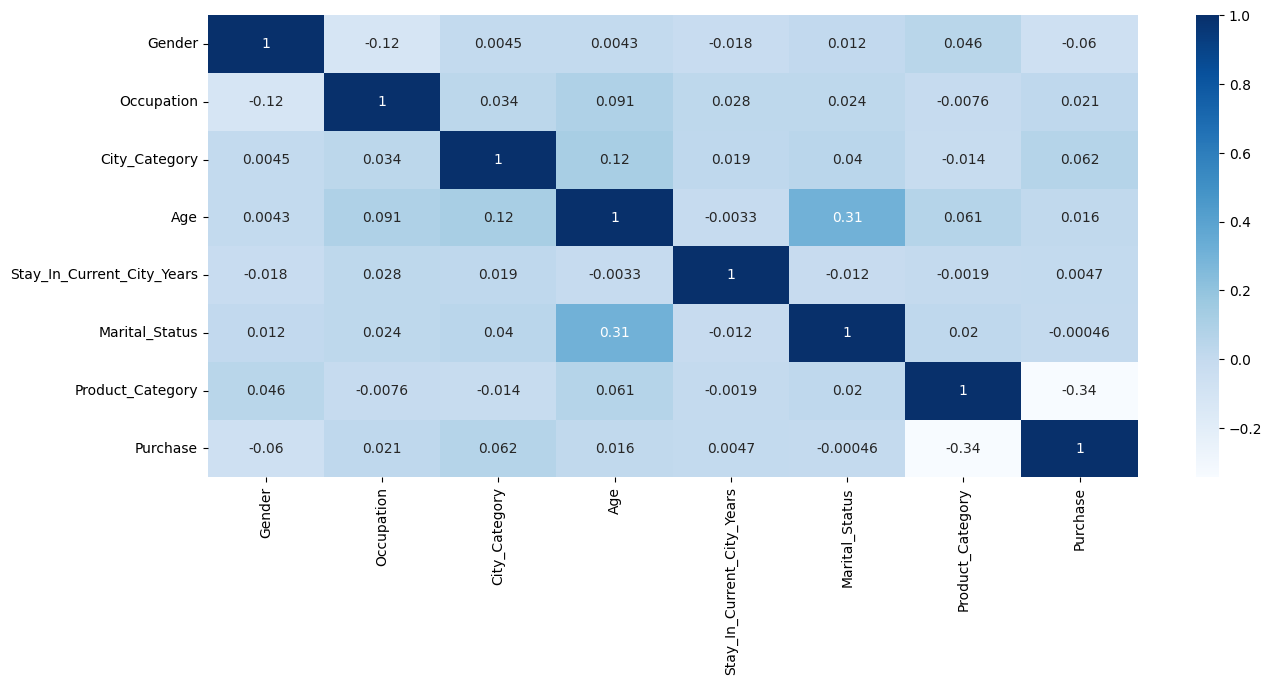

In [109]:
plt.figure(figsize=(15,6))
sns.heatmap(selectedcols_df.corr(), cmap="Blues", annot=True)
plt.show()

**Observations:**


*   There is no strong linear relationship between most independent variables and purchase amount.
*   The most influential variable (based on correlation) appears to be Product_Category, with a moderate negative impact on Purchase.
*    As male dominating to female purchase but the effect is minimal.

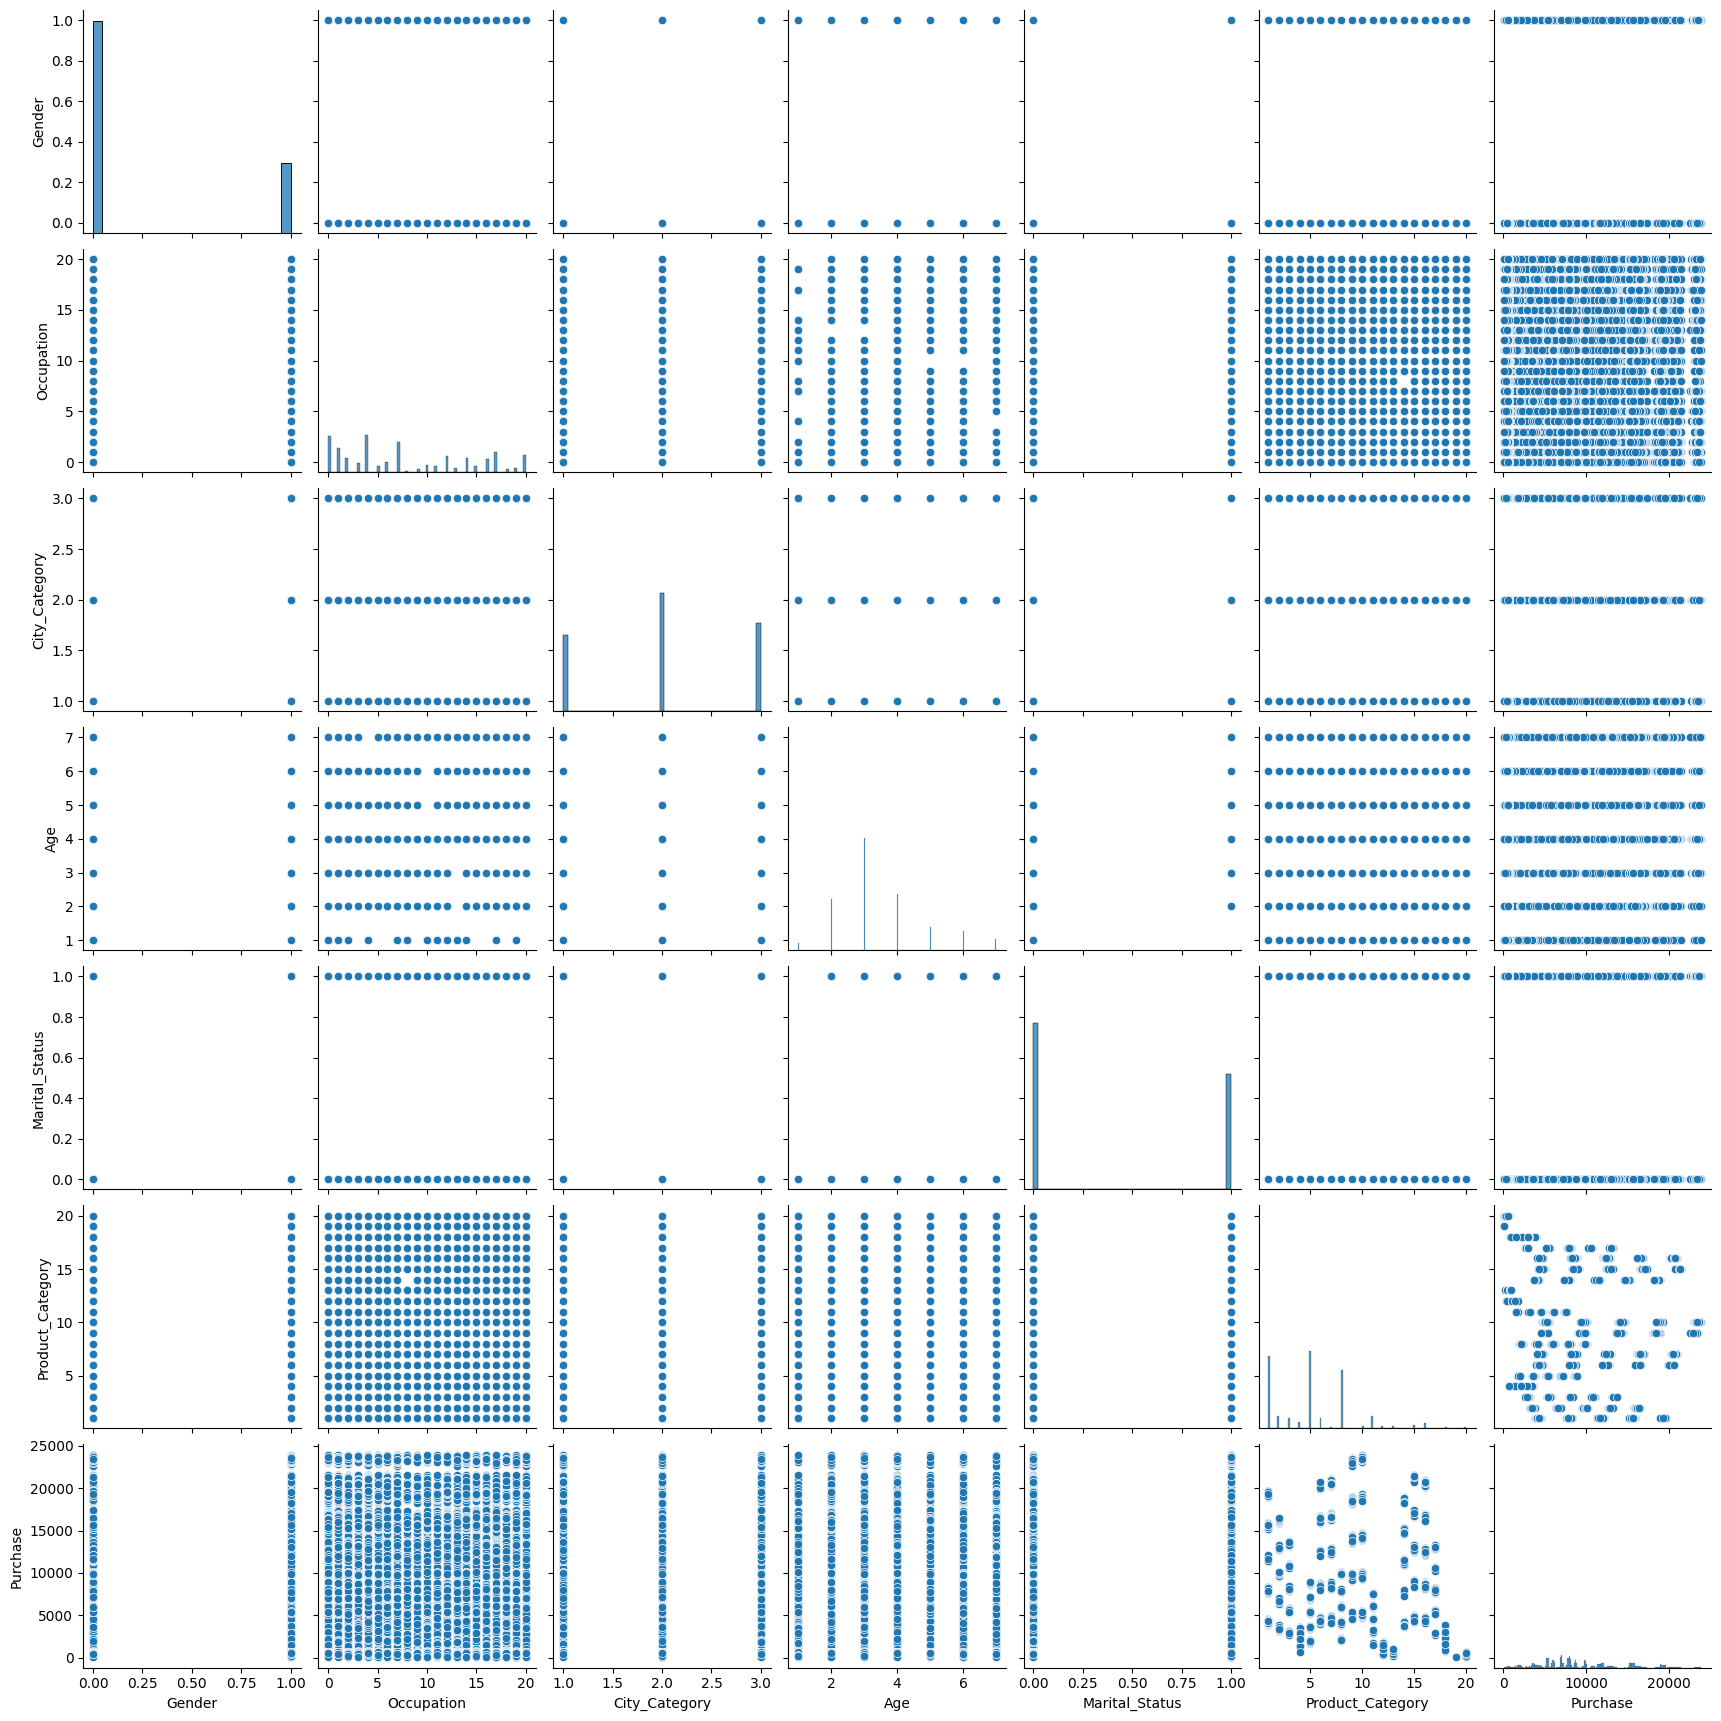

In [110]:
sns.pairplot(data=selectedcols_df)
plt.show()

# **Q2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)**


**Missing Value & Outlier Detection**

In [30]:
df_copy.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Observations:**
* Each column (like User_ID, Product_ID, Gender, Age, etc.) has 0 null values.

* This means your dataset is complete and clean with respect to missing data — there are no NaN or None values.

In [31]:
df_describe = df['Purchase'].describe()
df_describe

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [32]:
IQR = df_describe['75%'] - df_describe['25%']
IQR

np.float64(6231.0)

In [33]:
lower_bound = df_describe['25%'] - 1.5 * IQR
lower_bound

np.float64(-3523.5)

In [34]:
upper_bound = df_describe['75%'] + 1.5 * IQR
upper_bound

np.float64(21400.5)

**Observation:**

*   Since lower_bound is negative and purchase amounts can't be negative, only values > 21,400.5 are considered outliers.



In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
   outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
   print(f"{col} - Outliers: {len(outliers)}")


User_ID - Outliers: 550068
Occupation - Outliers: 0
Marital_Status - Outliers: 0
Product_Category - Outliers: 0
Purchase - Outliers: 2677


**Observations :**
*   Purchase column has 2,677 outliers. Other numerical columns (Occupation, Marital_Status, Product_Category) have 0 outliers.
*   User_ID shows 550,068 outliers, but this is not meaningful since it's a unique identifier, not a continuous feature.

**Note:**
*   As purchase colum is the target column for this analysis, we should not perform outlier treatment like (capping  or removal) bindly.




# **Q3. Do some data exploration steps like:**

**1) Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.**

**Null Hypothesis (H₀):**
The average purchase amounts of male and female customers are equal.
→ μ₁ = μ₂

**Alternative Hypothesis (H₁):**
The average purchase amounts of male and female customers are not equal.
→ μ₁ ≠ μ₂

In [36]:
from scipy.stats import ttest_ind
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']
t_stat, p_value = ttest_ind(male_purchase, female_purchase)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
#Assume significance_level = 5%
alpha = 0.05
if p_value < alpha:
  print("Reject Null Hypothesis: The average purchase amounts of male and female customers are not equal. ")
else:
  print("Fail to reject Null Hypothesis: The average purchase amounts of male and female customers are equal. ")

T-statistic: 44.837957934353966
P-value: 0.0
Reject Null Hypothesis: The average purchase amounts of male and female customers are not equal. 


**Conclusion:**

We can Conclude that the average purchase amount of male and female customers are not equal.

**2) Inference after computing the average female and male expenses.**

In [37]:
avg_male_purchase = df[df['Gender'] == 'M']['Purchase'].mean()
print(f"Average purchase by male customers: ₹{avg_male_purchase:.2f}")
avg_female_purchase = df[df['Gender'] == 'F']['Purchase'].mean()
print(f"Average purchase by female customers: ₹{avg_female_purchase:.2f}")

Average purchase by male customers: ₹9437.53
Average purchase by female customers: ₹8734.57


**Observation:**

On average, female customers spend 8734.57/- per transaction, whereas male customers spend 9437.53/- per transaction.

**3) Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.**

In [38]:
from scipy.stats import t
# Extract the sample
avg_male_purchase = df[df['Gender'] == 'M']['Purchase'].mean()
std_dev_male = df[df['Gender'] == 'M']['Purchase'].std()
count_male = df[df['Gender'] == 'M']['Purchase'].count()

# Usually will use 95% confidence interval
Confidence_level = 0.95
alpha = 1- Confidence_level
# As per altenate hypothesis means are not equal for both male and female , so it follows two-tailed t-test (std is unknown)

alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=count_male-1)

margin_error = t_critical * (std_dev_male / np.sqrt(count_male))

lower_bound = avg_male_purchase -  margin_error
upper_bound = avg_male_purchase + margin_error

print("The confidence interval for average spending of all 50 million male customers:", {lower_bound, upper_bound})

The confidence interval for average spending of all 50 million male customers: {np.float64(9453.032678888716), np.float64(9422.019402055814)}


In [39]:
from scipy.stats import t
# Extract the sample
avg_female_purchase = df[df['Gender'] == 'F']['Purchase'].mean()
std_dev_female = df[df['Gender'] == 'F']['Purchase'].std()
count_female = df[df['Gender'] == 'F']['Purchase'].count()

# Usually will use 95% confidence interval
Confidence_level = 0.95
alpha = 1- Confidence_level
# As per altenate hypothesis means are not equal for both male and female , so it follows two-tailed t-test (std is unknown)

alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=count_male-1)

margin_error = t_critical * (std_dev_female / np.sqrt(count_female))

lower_bound = avg_female_purchase - margin_error
upper_bound = avg_female_purchase + margin_error

print("The confidence interval for average spending of all 50 million female customers:", {lower_bound, upper_bound})

The confidence interval for average spending of all 50 million female customers: {np.float64(8709.211473061388), np.float64(8759.920057249563)}


**Conclusion:**

The confidence interval -
* Average spending of all 50 million female customers: 9453.0326 and 9422.0194.
* Average spending of all 50 million female customers: 8709.2114 and 8759.9200.

# **Q4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.**
**The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.**

In [40]:
from scipy.stats import norm
male_purchase = df[df['Gender'] == 'M']['Purchase']
def compute_clt_ci(data, sample_size, confidence=0.95):
    sample = data.sample(sample_size, random_state=42)
    x̄ = sample.mean()
    s = sample.std()
    z = norm.ppf(1 - (1 - confidence)/2)
    margin_error = z * (s / np.sqrt(sample_size))
    lower = x̄ - margin_error
    upper = x̄ + margin_error
    return x̄, (lower, upper)

for size in [1000, 5000, 10000]:
    for conf in [0.90, 0.95, 0.99]:
        mean, interval = compute_clt_ci(male_purchase, sample_size=size, confidence=conf)
        print(f"Sample Size = {size}, Confidence Level = {int(conf*100)}%")
        print(f"Sample Mean = {mean:.2f}, Confidence Interval = {interval}\n")


Sample Size = 1000, Confidence Level = 90%
Sample Mean = 9683.19, Confidence Interval = (np.float64(9418.475603724251), np.float64(9947.898396275748))

Sample Size = 1000, Confidence Level = 95%
Sample Mean = 9683.19, Confidence Interval = (np.float64(9367.763916452224), np.float64(9998.610083547776))

Sample Size = 1000, Confidence Level = 99%
Sample Mean = 9683.19, Confidence Interval = (np.float64(9268.650800341831), np.float64(10097.723199658169))

Sample Size = 5000, Confidence Level = 90%
Sample Mean = 9532.46, Confidence Interval = (np.float64(9412.610682516693), np.float64(9652.316917483306))

Sample Size = 5000, Confidence Level = 95%
Sample Mean = 9532.46, Confidence Interval = (np.float64(9389.650001949469), np.float64(9675.27759805053))

Sample Size = 5000, Confidence Level = 99%
Sample Mean = 9532.46, Confidence Interval = (np.float64(9344.7746542446), np.float64(9720.152945755399))

Sample Size = 10000, Confidence Level = 90%
Sample Mean = 9509.55, Confidence Interval = (

In [41]:
population_male_meanpurchase = df[df['Gender'] == 'M']['Purchase'].mean()
print(f"Population mean for male = {population_male_meanpurchase}")


Population mean for male = 9437.526040472265


In [42]:
male_purchase = df[df['Gender'] == 'M']['Purchase']
sample_sizes = [1000, 5000, 10000]
confidence_levels = [0.90, 0.95, 0.99]
np.random.seed(123)
print("\033[1mDistribution for male customers:\033[0m")
for size in sample_sizes:
    sample = male_purchase.sample(n=size, random_state=42)
    x̄ = sample.mean()
    s = sample.std(ddof=1)
    n = size
    dfree = n - 1

    print(f"\nSample size: {size}")
    print(f"Sample mean: {x̄:.2f}, Sample std dev: {s:.2f}")

    for conf in confidence_levels:
        alpha = 1 - conf
        t_crit = t.ppf(1 - alpha/2, df=dfree)
        margin_error = t_crit * (s / np.sqrt(n))
        lower = x̄ - margin_error
        upper = x̄ + margin_error

        print(f"{int(conf*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f}) | Margin of Error: {margin_error:.2f}")



Distribution for male customers:

Sample size: 1000
Sample mean: 9683.19, Sample std dev: 5089.15
90% Confidence Interval: (9418.23, 9948.14) | Margin of Error: 264.96
95% Confidence Interval: (9367.38, 9998.99) | Margin of Error: 315.81
99% Confidence Interval: (9267.86, 10098.52) | Margin of Error: 415.33

Sample size: 5000
Sample mean: 9532.46, Sample std dev: 5152.37
90% Confidence Interval: (9412.59, 9652.34) | Margin of Error: 119.88
95% Confidence Interval: (9389.62, 9675.31) | Margin of Error: 142.85
99% Confidence Interval: (9344.70, 9720.22) | Margin of Error: 187.76

Sample size: 10000
Sample mean: 9509.55, Sample std dev: 5109.04
90% Confidence Interval: (9425.51, 9593.60) | Margin of Error: 84.04
95% Confidence Interval: (9409.41, 9609.70) | Margin of Error: 100.15
99% Confidence Interval: (9377.93, 9641.18) | Margin of Error: 131.63


In [43]:
population_female_meanpurchase = df[df['Gender'] == 'F']['Purchase'].mean()
print(f"Population mean for female = {population_female_meanpurchase}")

Population mean for female = 8734.565765155476


In [44]:
female_purchase = df[df['Gender'] == 'F']['Purchase']
sample_sizes = [1000, 5000, 10000]
confidence_levels = [0.90, 0.95, 0.99]
np.random.seed(123)
print("\033[1mDistribution for female customers:\033[0m")
for size in sample_sizes:
    sample = female_purchase.sample(n=size, random_state=42)
    x̄ = sample.mean()
    s = sample.std(ddof=1)
    n = size
    dfree = n - 1

    print(f"\nSample size: {size}")
    print(f"Sample mean: {x̄:.2f}, Sample std dev: {s:.2f}")

    for conf in confidence_levels:
        alpha = 1 - conf
        t_crit = t.ppf(1 - alpha/2, df=dfree)
        margin_error = t_crit * (s / np.sqrt(n))
        lower = x̄ - margin_error
        upper = x̄ + margin_error

        print(f"{int(conf*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f}) | Margin of Error: {margin_error:.2f}")


Distribution for female customers:

Sample size: 1000
Sample mean: 8729.31, Sample std dev: 4842.05
90% Confidence Interval: (8477.22, 8981.41) | Margin of Error: 252.09
95% Confidence Interval: (8428.84, 9029.79) | Margin of Error: 300.47
99% Confidence Interval: (8334.15, 9124.48) | Margin of Error: 395.16

Sample size: 5000
Sample mean: 8771.88, Sample std dev: 4834.28
90% Confidence Interval: (8659.40, 8884.35) | Margin of Error: 112.47
95% Confidence Interval: (8637.85, 8905.91) | Margin of Error: 134.03
99% Confidence Interval: (8595.71, 8948.05) | Margin of Error: 176.17

Sample size: 10000
Sample mean: 8749.43, Sample std dev: 4801.03
90% Confidence Interval: (8670.45, 8828.40) | Margin of Error: 78.98
95% Confidence Interval: (8655.32, 8843.54) | Margin of Error: 94.11
99% Confidence Interval: (8625.74, 8873.12) | Margin of Error: 123.69


**Observations:**
*   As sample size increases, the width of the confidence interval decreases.This means you can estimate the true mean more precisely with larger samples.
*   As confidence level increases, the interval gets wider.
*   Larger sample sizes lead to narrower intervals, thus more precise estimates.
*   Higher confidence levels lead to wider intervals, ensuring more certainty at the cost of precision.

# **Q5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**

# **Are average male and female spends are overlapping or not overlapping?**

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def plot_gender_purchase_distribution(df, sample_size, confidence_level, n=1000, random_state=None):
    # Step 1: Filter data
    male_data = df[df["Gender"] == "M"]["Purchase"]
    female_data = df[df["Gender"] == "F"]["Purchase"]

    # Step 2: Generate sample means
    male_means = [male_data.sample(sample_size, replace=True, random_state=random_state).mean() for _ in range(n)]
    female_means = [female_data.sample(sample_size, replace=True, random_state=random_state).mean() for _ in range(n)]

    # Step 3: Calculate CI percentiles
    alpha = (1 - confidence_level) * 100
    lower_percentile = alpha / 2
    upper_percentile = 100 - (alpha / 2)

    male_ci = np.percentile(male_means, [lower_percentile, upper_percentile])
    female_ci = np.percentile(female_means, [lower_percentile, upper_percentile])

    # Step 4: Plot distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(male_means, color='blue', kde=True, label='Male', stat='count', bins=30, alpha=0.1)
    sns.histplot(female_means, color='red', kde=True, label='Female', stat='count', bins=30, alpha=0.1)

    # Mean lines
    plt.axvline(np.mean(male_means), color='blue', linestyle='--')
    plt.axvline(np.mean(female_means), color='red', linestyle='--')

    # CI lines
    plt.axvline(male_ci[0], color='green', linestyle='--')
    plt.axvline(male_ci[1], color='green', linestyle='--')
    plt.axvline(female_ci[0], color='green', linestyle=':')
    plt.axvline(female_ci[1], color='green', linestyle=':')

    # Legend
    legend_elements = [
        Line2D([0], [0], color='blue', linestyle='--', label='Male Mean'),
        Line2D([0], [0], color='red', linestyle='--', label='Female Mean'),
        Line2D([0], [0], color='green', linestyle='--', label=f'Male {int(confidence_level * 100)}% CI'),
        Line2D([0], [0], color='green', linestyle=':', label=f'Female {int(confidence_level * 100)}% CI'),
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    # Titles and labels
    plt.title(f"Purchase Mean Distribution (Sample Size = {sample_size}, CI = {int(confidence_level * 100)}%)")
    plt.xlabel("Sample Mean Purchase")
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**Confidence level = 90%  for diffrent sample sizes**

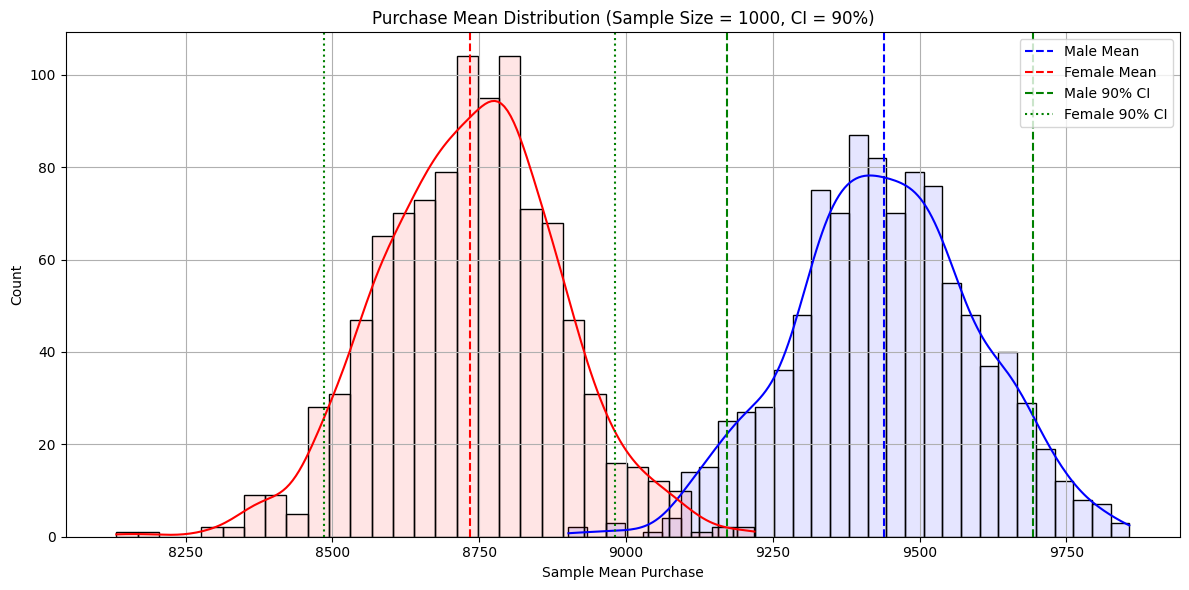

In [48]:
plot_gender_purchase_distribution(df, 1000, 0.90)

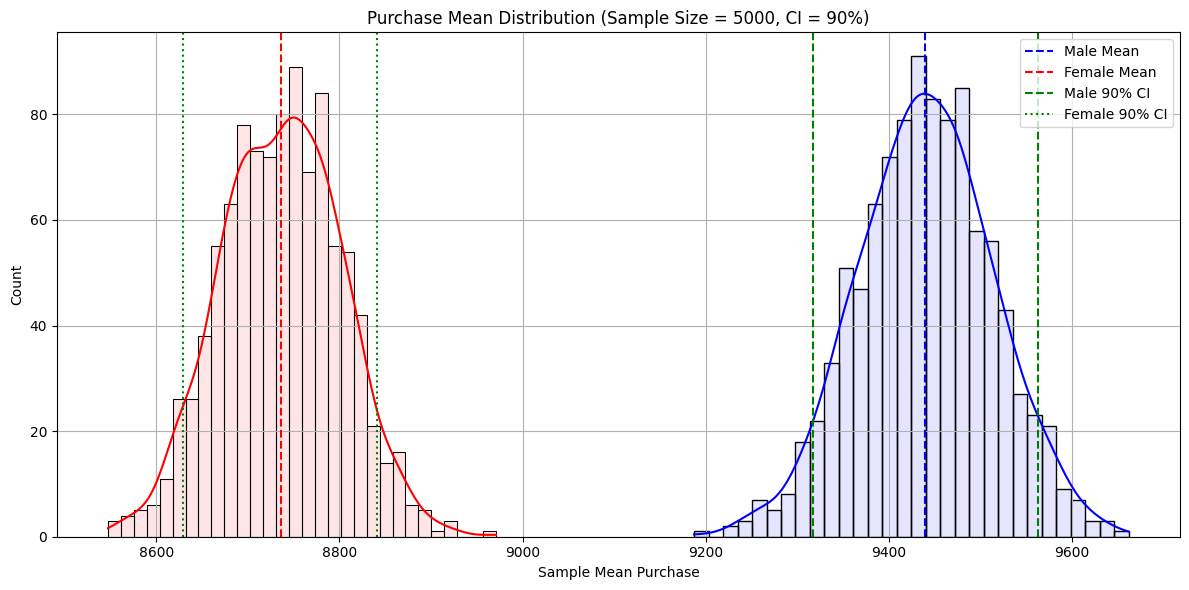

In [71]:
plot_gender_purchase_distribution(df, 5000, 0.90)

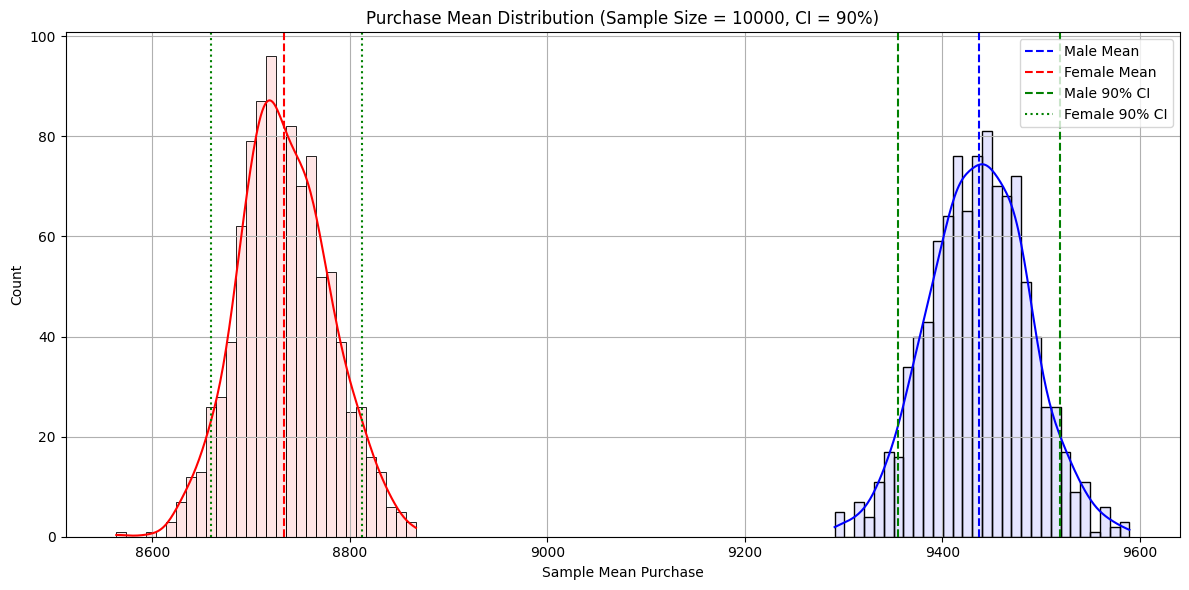

In [72]:
plot_gender_purchase_distribution(df, 10000, 0.90)

# **Observation:**
**Effect of Sample Size on Confidence Interval = 90%**

*  Sample Size = 1000

The confidence intervals are wider, meaning there’s more uncertainty in the estimate.

There's more overlap between male and female sample means, so the difference in spending is less clear.

*  Sample Size = 5000

The confidence intervals become narrower, meaning we are more confident about the average purchase estimate.

There is less overlap between male and female distributions, suggesting the difference is becoming more noticeable.

*  Sample Size = 10000

The confidence intervals are the narrowest, showing very high precision in estimating the average.

The male and female purchase distributions are clearly separated, indicating a statistically meaningful difference in spending habits.



**Confidence level = 95%  for diffrent sample sizes**

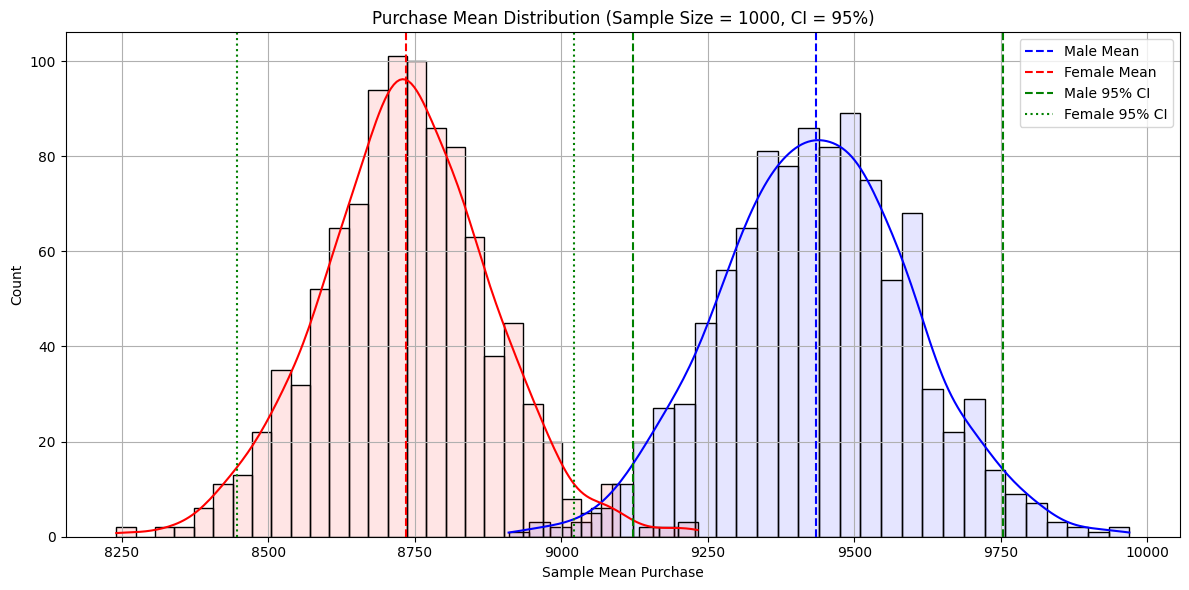

In [73]:
plot_gender_purchase_distribution(df, 1000, 0.95)

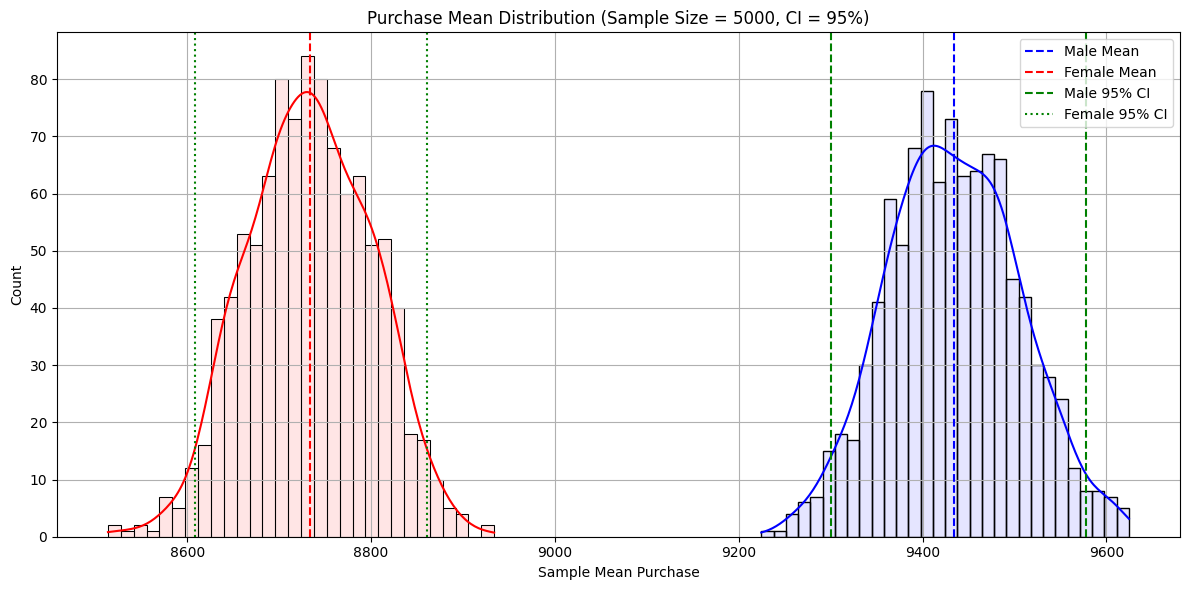

In [75]:
plot_gender_purchase_distribution(df, 5000, 0.95)

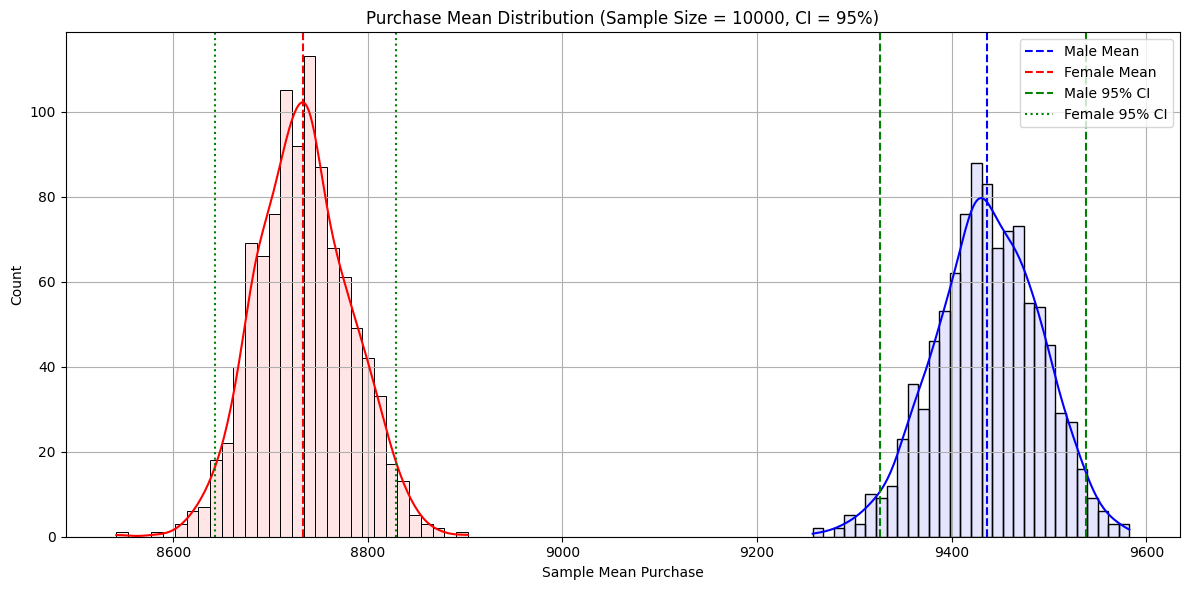

In [76]:
plot_gender_purchase_distribution(df, 10000, 0.95)

**Effect of sample size on confidence interval = 95%**

*  Sample Size = 1000:

The confidence intervals for male and female purchase means show some overlap.

The difference in average spending is not statistically clear, and might be due to random variation.

*  Sample Size = 5000:

The confidence intervals become narrower.

Very little or no overlap is visible between male and female distributions.

This suggests a more reliable difference in average spending.

*  Sample Size = 10000:

Confidence intervals are the narrowest and well-separated.

There is no overlap, clearly indicating that female customers spend more than male customers.

The result is statistically significant and unlikely to be due to chance.

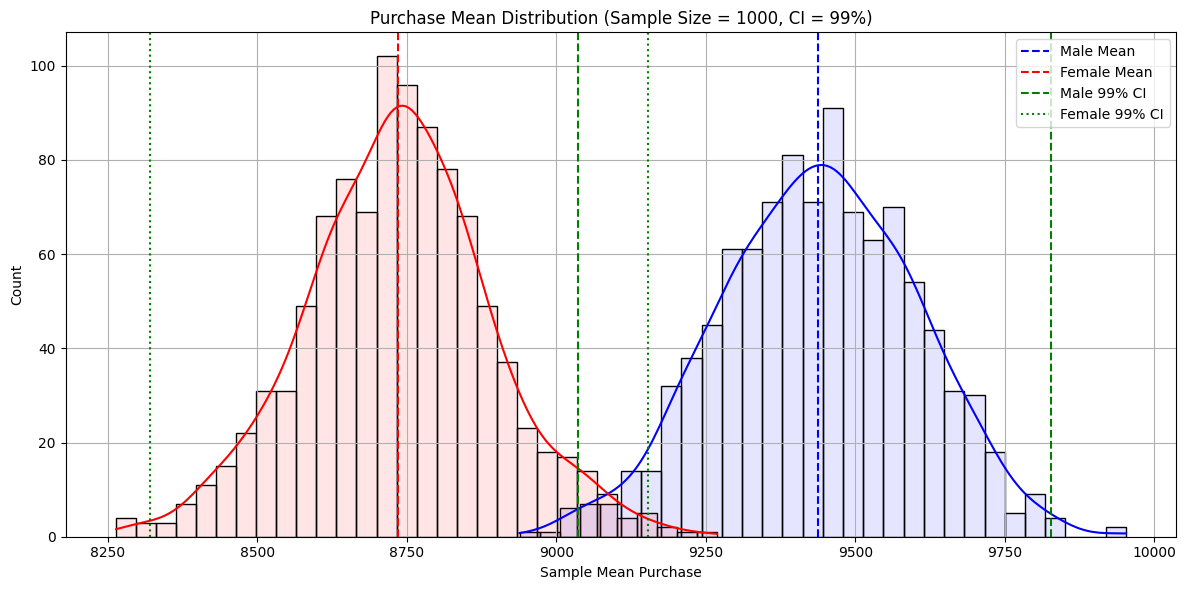

In [77]:
plot_gender_purchase_distribution(df, 1000, 0.99)

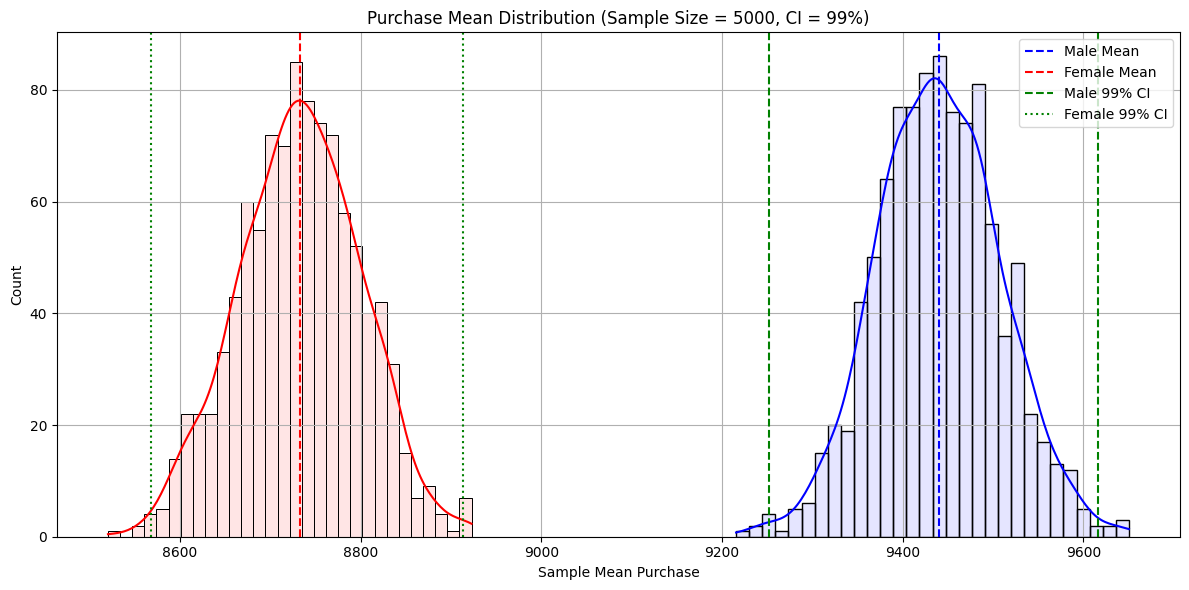

In [78]:
plot_gender_purchase_distribution(df, 5000, 0.99)

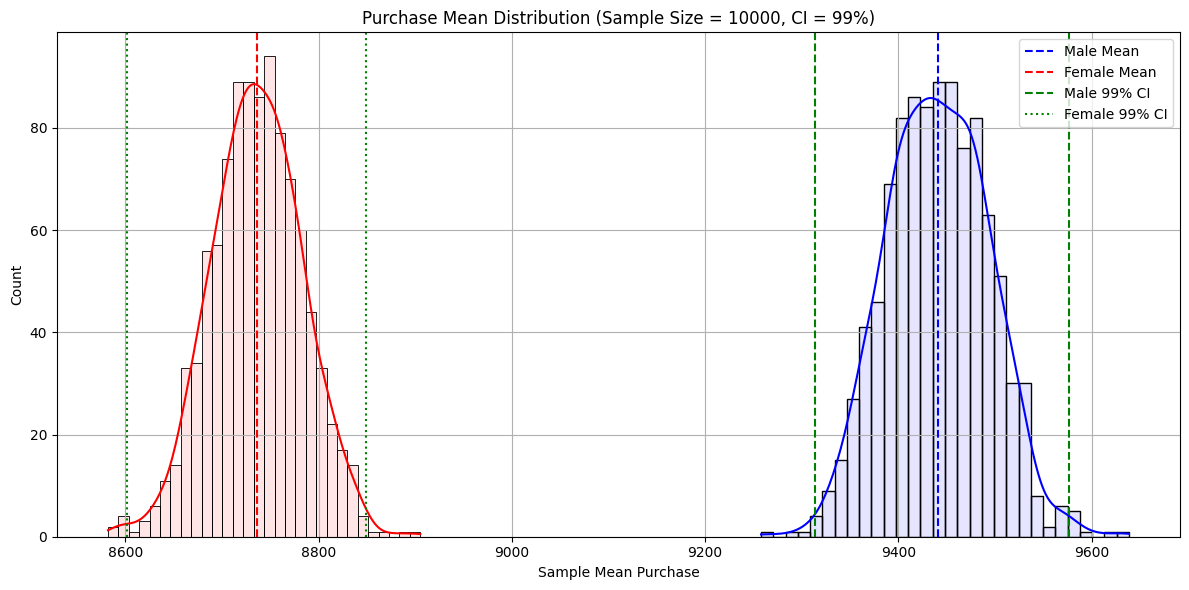

In [79]:
plot_gender_purchase_distribution(df, 10000, 0.99)

**Effect of sample size on confidence interval = 99%**

*  Sample Size = 1000
The confidence intervals are wide for both male and female groups.

There is some overlap between male and female intervals.

This means the difference in spending is not clearly visible and could be due to chance.

*  Sample Size = 5000
The confidence intervals become narrower.

The overlap reduces, making the difference between male and female spending more noticeable.

Still, there is a small margin of shared range.

*  Sample Size = 10000
The intervals are very tight.

There is clear separation between male and female spending averages.

This indicates a strong and reliable difference in spending behavior.

**Conclusion:**

**90% Confidence:**

Gives narrow intervals, but there's more chance of error.

Useful for quicker decisions but less strict.

**95% Confidence:**

Balances precision and reliability.

Often used in business and statistics as a standard.

**99% Confidence:**

Gives wider intervals, but is more reliable.

Needs larger samples to show clear differences.

**Effect of Sample Size:**

Larger samples make confidence intervals narrower, meaning we can trust the results more.

As sample size increases, even at higher confidence levels, the difference between groups becomes clear and reliable.

# **How can Walmart leverage this conclusion to make changes or improvements?**

Since male customers spend more, Walmart can:

* Offer them special bundles or exclusive deals to encourage even more spending.

* Create personalized ads or loyalty rewards targeted at male shoppers.

For female customers, Walmart could:

* Use discounts, coupons, or value packs to encourage them to spend a little more.

* Look into what products women buy most and try to improve offers in those areas.

#**Q6. Perform the same activity for Married vs Unmarried and Age. For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.**

**Check if the confidence intervals of average married and unmarried spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**

Assume ,

*   Married means 1
*   Unmarried means 0


In [53]:
population_married_meanpurchase = df[df['Marital_Status'] == 1]['Purchase'].mean()
print(f"Population mean for married = {population_married_meanpurchase}")

Population mean for married = 9261.174574082374


In [54]:
married_purchase = df[df['Marital_Status'] == 1]['Purchase']
sample_sizes = [100, 500, 1000]
confidence_levels = [0.90, 0.95, 0.99]
np.random.seed(123)
print("\033[1mDistribution for married customers:\033[0m")
for size in sample_sizes:
    sample = married_purchase.sample(n=size, random_state=42)
    x̄ = sample.mean()
    s = sample.std(ddof=1)
    n = size
    dfree = n - 1

    print(f"\nSample size: {size}")
    print(f"Sample mean: {x̄:.2f}, Sample std dev: {s:.2f}")

    for conf in confidence_levels:
        alpha = 1 - conf
        t_crit = t.ppf(1 - alpha/2, df=dfree)
        margin_error = t_crit * (s / np.sqrt(n))
        lower = x̄ - margin_error
        upper = x̄ + margin_error

        print(f"{int(conf*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f}) | Margin of Error: {margin_error:.2f}")

Distribution for married customers:

Sample size: 100
Sample mean: 9553.48, Sample std dev: 5228.70
90% Confidence Interval: (8685.31, 10421.65) | Margin of Error: 868.17
95% Confidence Interval: (8515.99, 10590.97) | Margin of Error: 1037.49
99% Confidence Interval: (8180.21, 10926.75) | Margin of Error: 1373.27

Sample size: 500
Sample mean: 9450.90, Sample std dev: 5085.84
90% Confidence Interval: (9076.09, 9825.71) | Margin of Error: 374.81
95% Confidence Interval: (9004.03, 9897.77) | Margin of Error: 446.87
99% Confidence Interval: (8862.79, 10039.01) | Margin of Error: 588.11

Sample size: 1000
Sample mean: 9142.70, Sample std dev: 5023.46
90% Confidence Interval: (8881.16, 9404.23) | Margin of Error: 261.54
95% Confidence Interval: (8830.97, 9454.43) | Margin of Error: 311.73
99% Confidence Interval: (8732.73, 9552.67) | Margin of Error: 409.97


In [55]:
population_unmarried_meanpurchase = df[df['Marital_Status'] == 0]['Purchase'].mean()
print(f"Population mean for unmarried = {population_unmarried_meanpurchase}")

Population mean for unmarried = 9265.907618921507


In [56]:
unmarried_purchase = df[df['Marital_Status'] == 0]['Purchase']
sample_sizes = [100, 500, 1000]
confidence_levels = [0.90, 0.95, 0.99]
np.random.seed(123)
print("\033[1mDistribution for unmarried customers:\033[0m")
for size in sample_sizes:
    sample = unmarried_purchase.sample(n=size, random_state=42)
    x̄ = sample.mean()
    s = sample.std(ddof=1)
    n = size
    dfree = n - 1

    print(f"\nSample size: {size}")
    print(f"Sample mean: {x̄:.2f}, Sample std dev: {s:.2f}")

    for conf in confidence_levels:
        alpha = 1 - conf
        t_crit = t.ppf(1 - alpha/2, df=dfree)
        margin_error = t_crit * (s / np.sqrt(n))
        lower = x̄ - margin_error
        upper = x̄ + margin_error

        print(f"{int(conf*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f}) | Margin of Error: {margin_error:.2f}")

Distribution for unmarried customers:

Sample size: 100
Sample mean: 9992.41, Sample std dev: 5166.19
90% Confidence Interval: (9134.62, 10850.20) | Margin of Error: 857.79
95% Confidence Interval: (8967.33, 11017.49) | Margin of Error: 1025.08
99% Confidence Interval: (8635.56, 11349.26) | Margin of Error: 1356.85

Sample size: 500
Sample mean: 9558.48, Sample std dev: 5061.76
90% Confidence Interval: (9185.44, 9931.52) | Margin of Error: 373.04
95% Confidence Interval: (9113.73, 10003.23) | Margin of Error: 444.75
99% Confidence Interval: (8973.15, 10143.81) | Margin of Error: 585.33

Sample size: 1000
Sample mean: 9388.18, Sample std dev: 5040.06
90% Confidence Interval: (9125.78, 9650.58) | Margin of Error: 262.40
95% Confidence Interval: (9075.42, 9700.94) | Margin of Error: 312.76
99% Confidence Interval: (8976.86, 9799.50) | Margin of Error: 411.32


**Observations:**

*   As sample size increases (from 1000 to 5000 then to 10000), the confidence intervals (CIs) become narrower, which means greater accuracy in estimating the average spend.
*   Unmarried customers tend to spend more on average than married customers, across all sample sizes.

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def plot_maritalstatus_purchase_distribution(df, sample_size, confidence_level, n=1000, random_state=None):
    # Step 1: Filter data
    unmarried_data = df[df["Marital_Status"] == 0]["Purchase"]
    married_data = df[df["Marital_Status"] == 1]["Purchase"]

    # Step 2: Generate sample means
    unmarried_means = [unmarried_data.sample(sample_size, replace=True, random_state=random_state).mean() for _ in range(n)]
    married_means = [married_data.sample(sample_size, replace=True, random_state=random_state).mean() for _ in range(n)]

    # Step 3: Calculate CI percentiles
    alpha = (1 - confidence_level) * 100
    lower_percentile = alpha / 2
    upper_percentile = 100 - (alpha / 2)

    unmarried_ci = np.percentile(unmarried_means, [lower_percentile, upper_percentile])
    married_ci = np.percentile(married_means, [lower_percentile, upper_percentile])

    # Step 4: Plot distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(unmarried_means, color='blue', kde=True, label='Male', stat='count', bins=30, alpha=0.1)
    sns.histplot(married_means, color='red', kde=True, label='Female', stat='count', bins=30, alpha=0.1)

    # Mean lines
    plt.axvline(np.mean(unmarried_means), color='blue', linestyle='--')
    plt.axvline(np.mean(married_means), color='red', linestyle='--')

    # CI lines
    plt.axvline(unmarried_ci[0], color='green', linestyle='--')
    plt.axvline(unmarried_ci[1], color='green', linestyle='--')
    plt.axvline(married_ci[0], color='green', linestyle=':')
    plt.axvline(married_ci[1], color='green', linestyle=':')

    # Legend
    legend_elements = [
        Line2D([0], [0], color='blue', linestyle='--', label='Male Mean'),
        Line2D([0], [0], color='red', linestyle='--', label='Female Mean'),
        Line2D([0], [0], color='green', linestyle='--', label=f'Male {int(confidence_level * 100)}% CI'),
        Line2D([0], [0], color='green', linestyle=':', label=f'Female {int(confidence_level * 100)}% CI'),
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    # Titles and labels
    plt.title(f"Purchase Mean Distribution (Sample Size = {sample_size}, CI = {int(confidence_level * 100)}%)")
    plt.xlabel("Sample Mean Purchase")
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


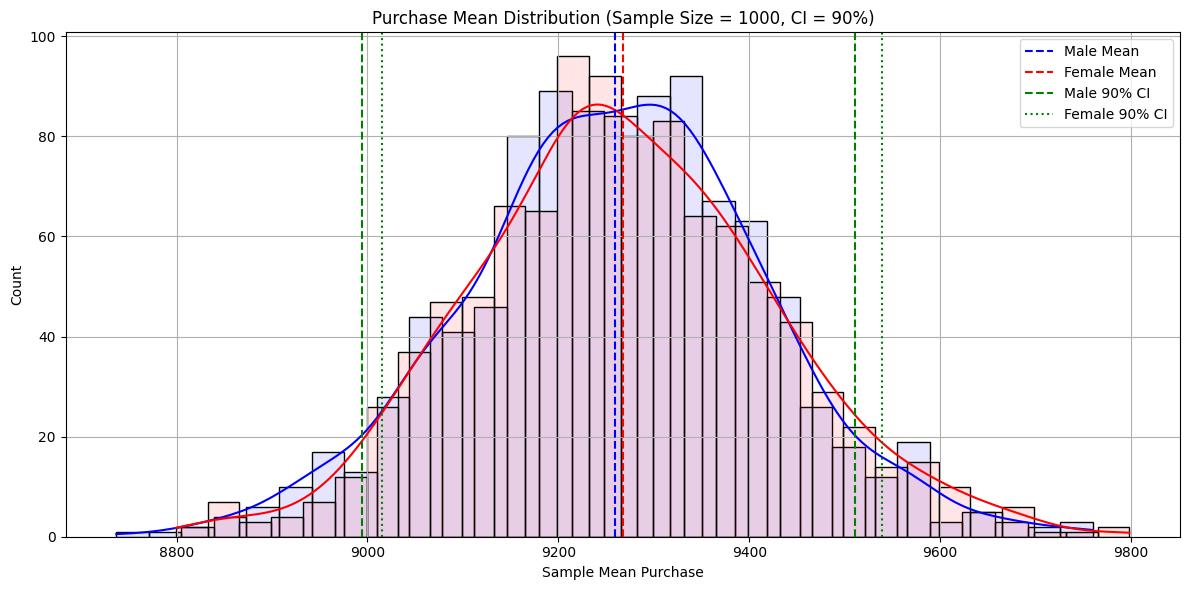

In [84]:
plot_maritalstatus_purchase_distribution(df, 1000, 0.90)

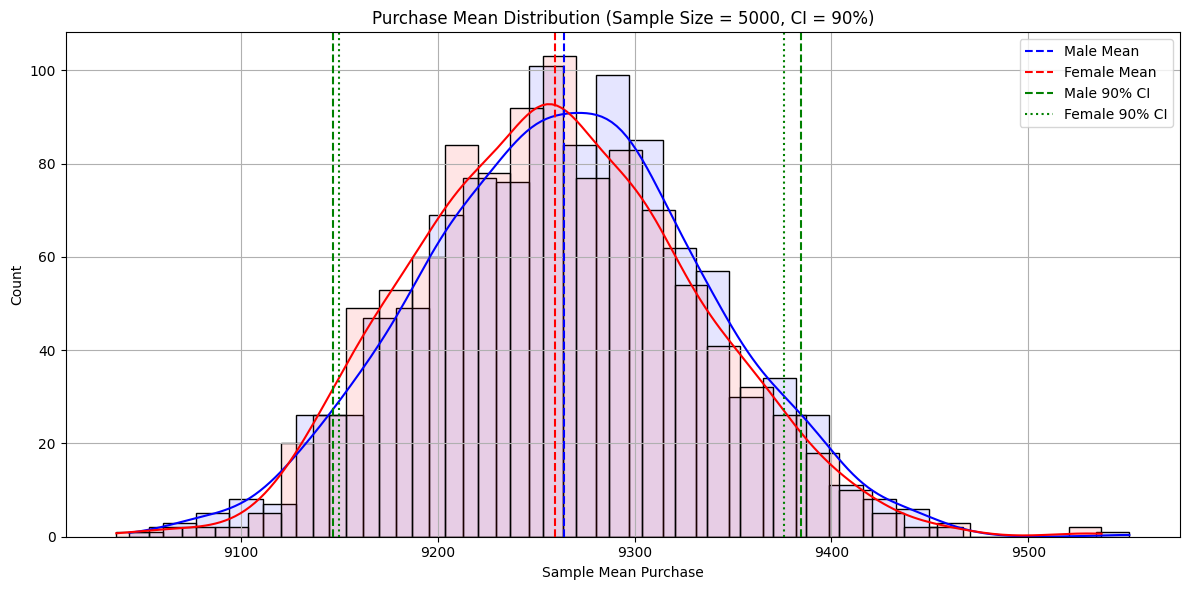

In [85]:
plot_maritalstatus_purchase_distribution(df, 5000, 0.90)

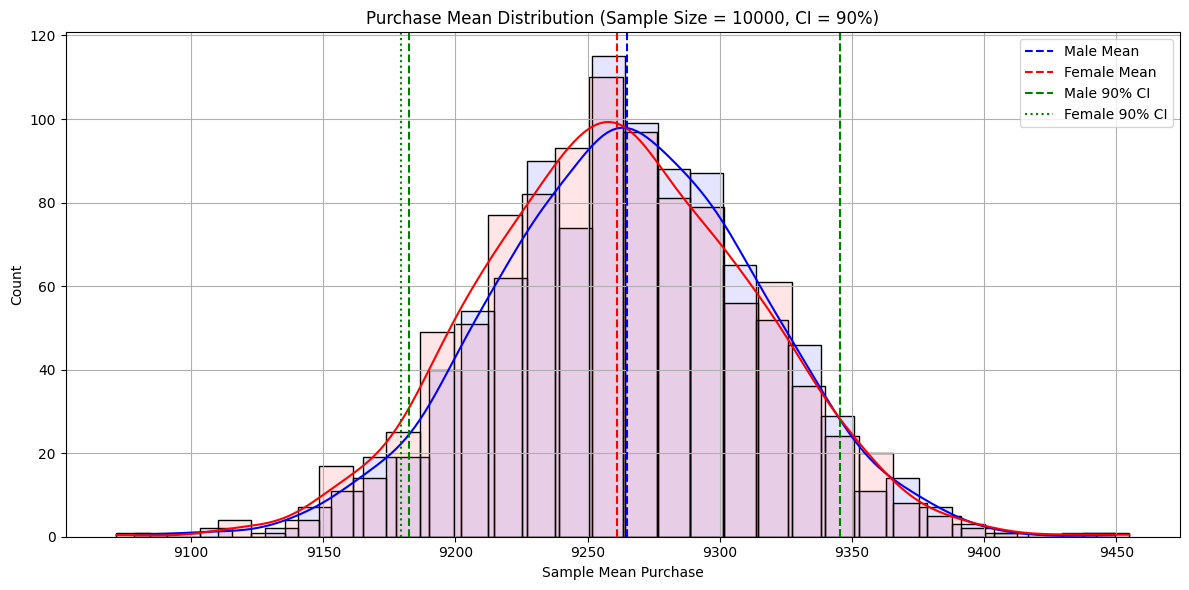

In [86]:
plot_maritalstatus_purchase_distribution(df, 10000, 0.90)

**Effect of sample size on confidence interval = 90%**

*  Sample Size = 1000

The confidence intervals for married and unmarried groups are wide and overlapping.

This means we can’t clearly say if one group spends more than the other — the difference may be due to random variation.

*  Sample Size = 5000

The intervals become narrower, showing more precision in estimating average purchase.

There is less overlap now — suggesting there may be a real difference in spending between married and unmarried groups.

*  Sample Size = 10000

The intervals are the tightest and well-separated.

This shows a clear and reliable difference in average spending between married and unmarried customers.

We start to see a reliable difference in average spending, with unmarried customers generally spending more.

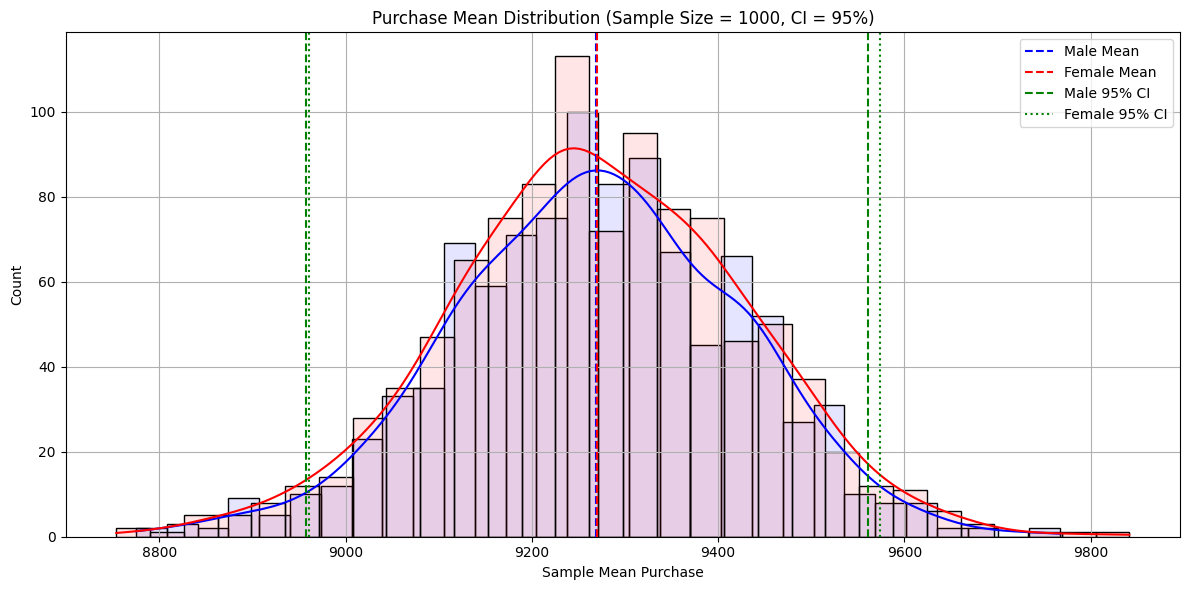

In [87]:
plot_maritalstatus_purchase_distribution(df, 1000, 0.95)

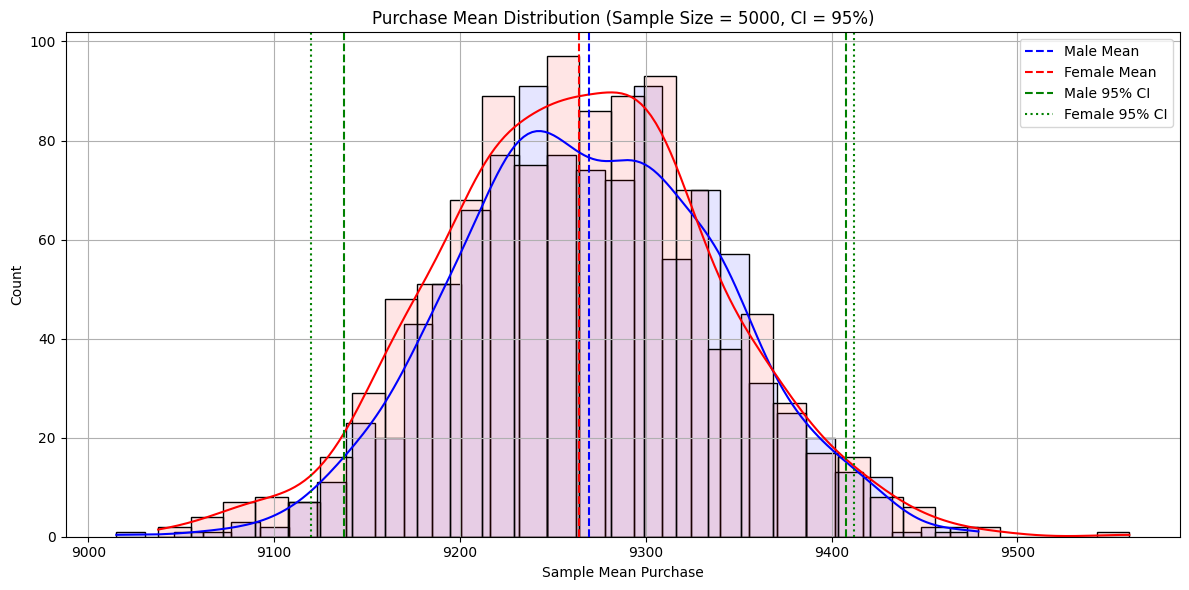

In [88]:
plot_maritalstatus_purchase_distribution(df, 5000, 0.95)

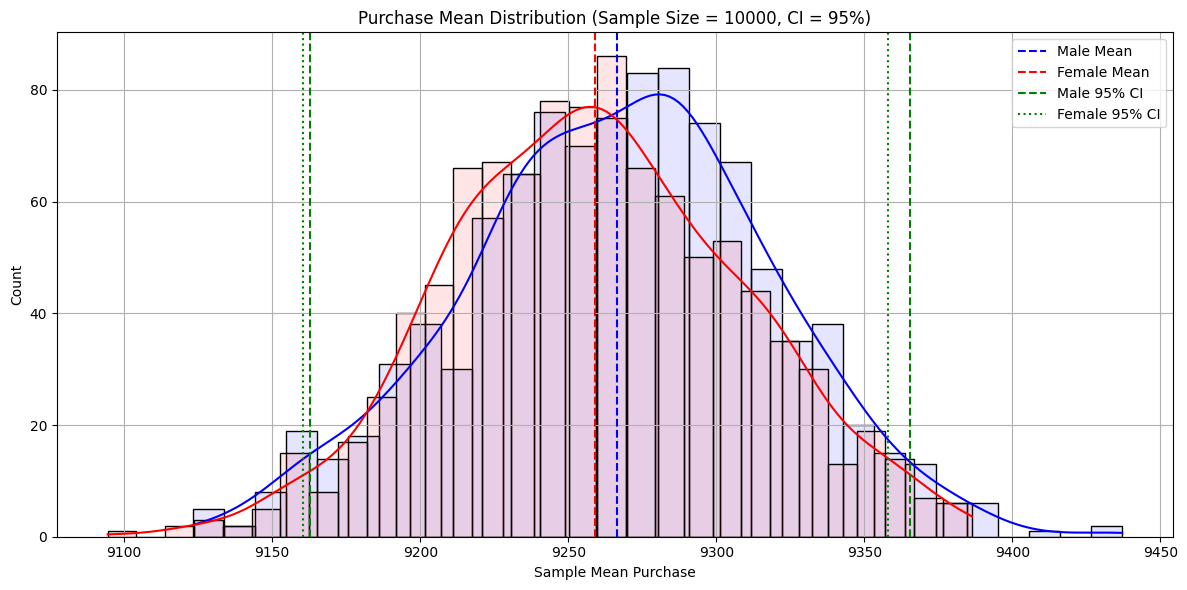

In [89]:
plot_maritalstatus_purchase_distribution(df, 10000, 0.95)

**Effect of sample size on confidence interval = 95%**

*  Sample Size = 1000

The confidence intervals are wide.

There is a lot of overlap between married and unmarried customers.

It’s not clear if one group spends more than the other — the difference might just be due to chance.

*  Sample Size = 5000

The confidence intervals are narrower.

The overlap decreases, and we start to see a small difference.

This suggests a possible real difference in average spending, though still not very strong.

*  Sample Size = 10000

The confidence intervals are tight and clearly separated.

This shows a clear and consistent difference in average spending between the two groups.

Unmarried customers appear to spend more than married customers.

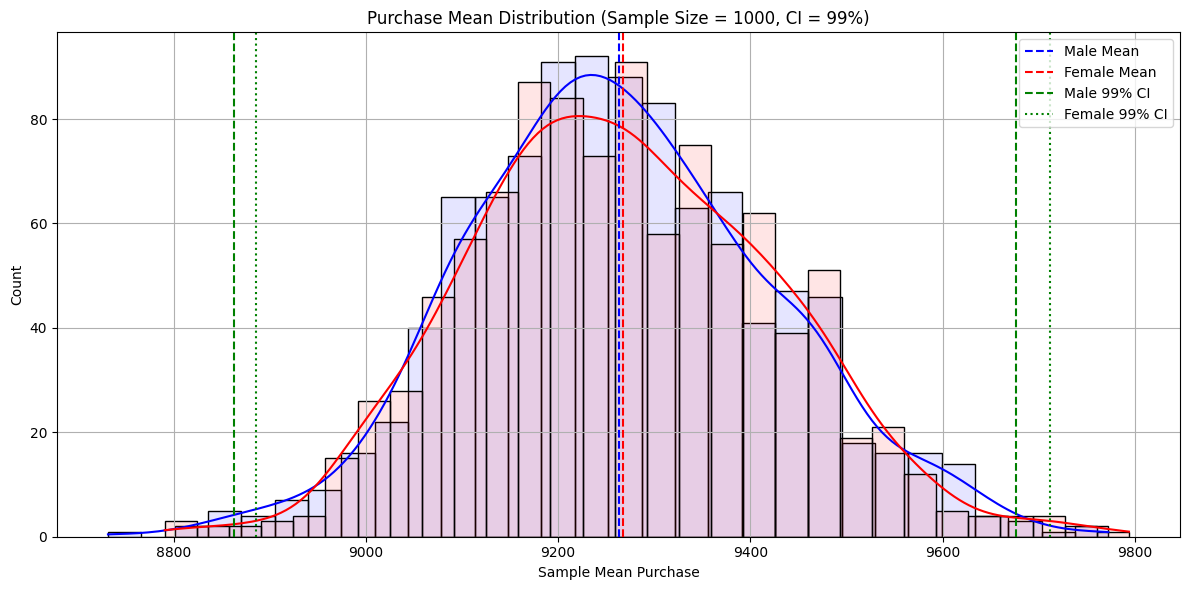

In [90]:
plot_maritalstatus_purchase_distribution(df, 1000, 0.99)

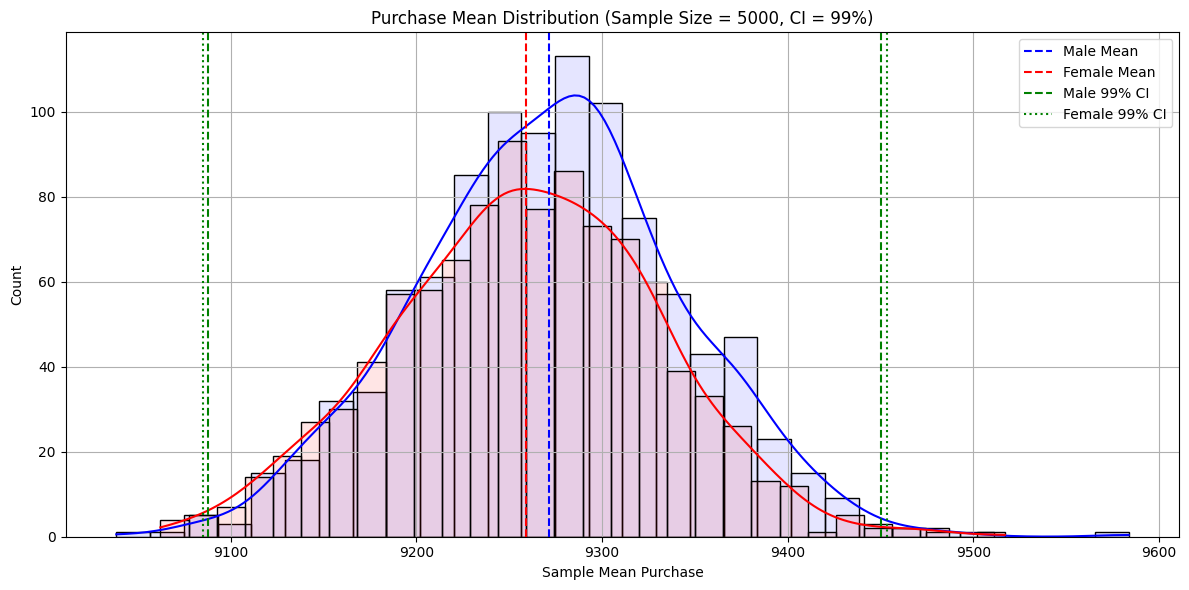

In [91]:
plot_maritalstatus_purchase_distribution(df, 5000, 0.99)

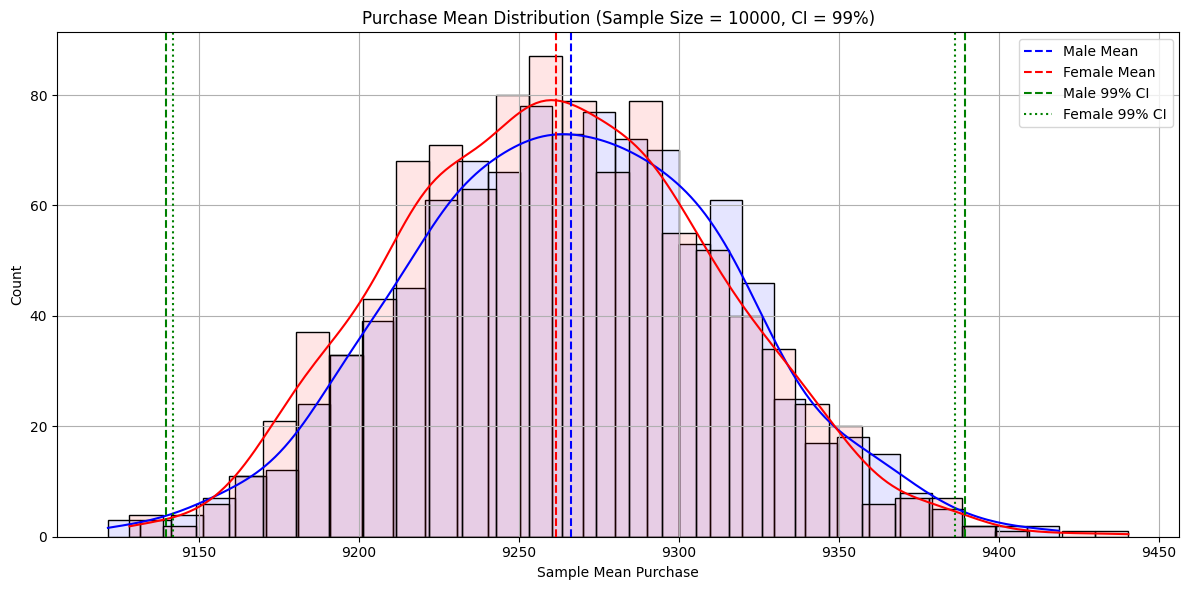

In [92]:
plot_maritalstatus_purchase_distribution(df, 10000, 0.99)

**Effect of sample size on confidence interval = 99%:**

*  Sample Size = 1000
The confidence intervals are wide and heavily overlap for married and unmarried groups.

This makes it unclear whether one group actually spends more — the difference could be random.

This happens across all confidence levels (90%, 95%, 99%).

*  Sample Size = 5000
The confidence intervals become narrower.

The overlap reduces, and a small gap between married and unmarried customers starts to show.

The higher the confidence level (like 99%), the wider the interval, but still more precise than with a small sample.

*  Sample Size = 10000
Confidence intervals are now very tight and clearly separated.

It's now very clear that unmarried customers spend more on average than married ones.

This difference is consistent across 90%, 95%, and 99% confidence levels.

**Conclusion:**

As sample size increases, the confidence intervals get narrower, which means the results become more reliable.

At lower sample sizes, we can't trust the differences, because they might just be due to chance.

At higher sample sizes, even at strict confidence levels like 99%, we can clearly see that unmarried customers tend to spend more.

Walmart can use this insight to create targeted marketing or discounts for unmarried shoppers who are likely to spend more.

**How can Walmart leverage this conclusion to make changes or improvements?**
*   Unmarried people spend more, so Walmart can show them ads for trendy or cool products like gadgets or personal care items.
*   Married customers may buy more for the family, Walmart can give them family packs, discounts on bulk items, or special rewards.
*   Walmart can suggest products based on whether someone is married or not.
*   Better stock in each store -
    * Stores in areas with more unmarried people can keep more premium or lifestyle products.
    * Stores with more married people can keep more family-use and daily items.
*   Walmart can test different discounts, coupons, or prices for married vs unmarried customers to increase sales.

**Check if the confidence intervals of average age group spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**

In [63]:
print(df['Age'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [93]:
df['AgeGroup'] = df['Age']
df['AgeGroup']
sample_sizes = [1000, 5000, 10000]
confidence_levels = [0.90, 0.95, 0.99]

for group in df['AgeGroup'].dropna().unique():
    group_data = df[df['AgeGroup'] == group]['Purchase']

    print(f"\n\033[1mDistribution for Age Group: {group}\033[0m")

    for size in sample_sizes:
        if len(group_data) >= size:
            print(f"\nSample Size = {size}")
            sample = group_data.sample(n=size, random_state=42)
            x̄ = sample.mean()
            s = sample.std(ddof=1)
            n = size

            for conf in confidence_levels:
                alpha = 1 - conf
                t_crit = t.ppf(1 - alpha/2, df=n - 1)
                margin_error = t_crit * (s / np.sqrt(n))
                lower = x̄ - margin_error
                upper = x̄ + margin_error

                print(f"{int(conf*100)}% CI: ({lower:.2f}, {upper:.2f}) | ME: {margin_error:.2f}")
        else:
            print(f"Not enough data in Age Group {group} for sample size {size}.")


Distribution for Age Group: 0-17

Sample Size = 1000
90% CI: (8515.34, 9068.44) | ME: 276.55
95% CI: (8462.27, 9121.51) | ME: 329.62
99% CI: (8358.39, 9225.39) | ME: 433.50

Sample Size = 5000
90% CI: (8762.57, 8999.53) | ME: 118.48
95% CI: (8739.86, 9022.23) | ME: 141.18
99% CI: (8695.47, 9066.62) | ME: 185.57

Sample Size = 10000
90% CI: (8829.11, 8997.05) | ME: 83.97
95% CI: (8813.02, 9013.14) | ME: 100.06
99% CI: (8781.57, 9044.59) | ME: 131.51

Distribution for Age Group: 55+

Sample Size = 1000
90% CI: (9120.86, 9646.96) | ME: 263.05
95% CI: (9070.38, 9697.44) | ME: 313.53
99% CI: (8971.57, 9796.25) | ME: 412.34

Sample Size = 5000
90% CI: (9192.92, 9428.64) | ME: 117.86
95% CI: (9170.33, 9451.22) | ME: 140.45
99% CI: (9126.17, 9495.38) | ME: 184.60

Sample Size = 10000
90% CI: (9277.13, 9442.88) | ME: 82.87
95% CI: (9261.25, 9458.76) | ME: 98.75
99% CI: (9230.22, 9489.79) | ME: 129.79

Distribution for Age Group: 26-35

Sample Size = 1000
90% CI: (8740.44, 9266.06) | ME: 262.81

**Obeservations:**
*   For sample size = 1000, Only the comparison between the 0–17 and 55+ age groups showed clearly non-overlapping confidence intervals, indicating a likely significant difference in their average purchase behavior.
*   For sample size = 5000, More non-overlaps now seen, especially between younger and older groups.
*   For larger sample sizes increase statistical power, resulting in more detectable differences and more non-overlapping confidence intervals.

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def plot_agewise_purchase_distribution(df, sample_size, confidence_level, n=500, random_state=None):
    age_groups = df['Age'].unique()
    age_sample_means = {}
    ci_bounds = {}

    alpha = (1 - confidence_level) * 100
    lower = alpha / 2
    upper = 100 - (alpha / 2)

    # Calculate sample means and confidence intervals
    for age in age_groups:
        group_data = df[df['Age'] == age]['Purchase']
        if len(group_data) >= sample_size:
            means = [group_data.sample(sample_size, replace=True, random_state=random_state).mean() for _ in range(n)]
            age_sample_means[age] = means
            ci_bounds[age] = np.percentile(means, [lower, upper])

    # Plotting
    plt.figure(figsize=(14, 8))
    colors = sns.color_palette("husl", len(age_sample_means))
    age_order = sorted(age_sample_means.keys(), key=lambda x: str(x))  # Sort age groups nicely
    legend_elements = []

    for i, age in enumerate(age_order):
        means = age_sample_means[age]
        color = colors[i]

        # Plot histogram with KDE
        sns.histplot(means, kde=True, bins=40, stat='density', label=f'Age {age}', color=color, alpha=0.3)

        # Mean line
        mean_val = np.mean(means)
        plt.axvline(mean_val, linestyle='--', color=color)
        legend_elements.append(Line2D([0], [0], color=color, linestyle='--', label=f'Age {age} Mean'))

        # CI lines
        lower_ci, upper_ci = ci_bounds[age]
        plt.axvline(lower_ci, color=color, linestyle=':')
        plt.axvline(upper_ci, color=color, linestyle=':')
        legend_elements.append(Line2D([0], [0], color=color, linestyle=':', label=f'Age {age} {int(confidence_level * 100)}% CI'))

    # Final touches
    plt.title(f"Sample Mean Purchase Distributions by Age (Sample Size = {sample_size}, CI = {int(confidence_level * 100)}%)")
    plt.xlabel("Sample Mean Purchase")
    plt.ylabel("Density")
    plt.legend(handles=legend_elements, title="Age Groups", loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


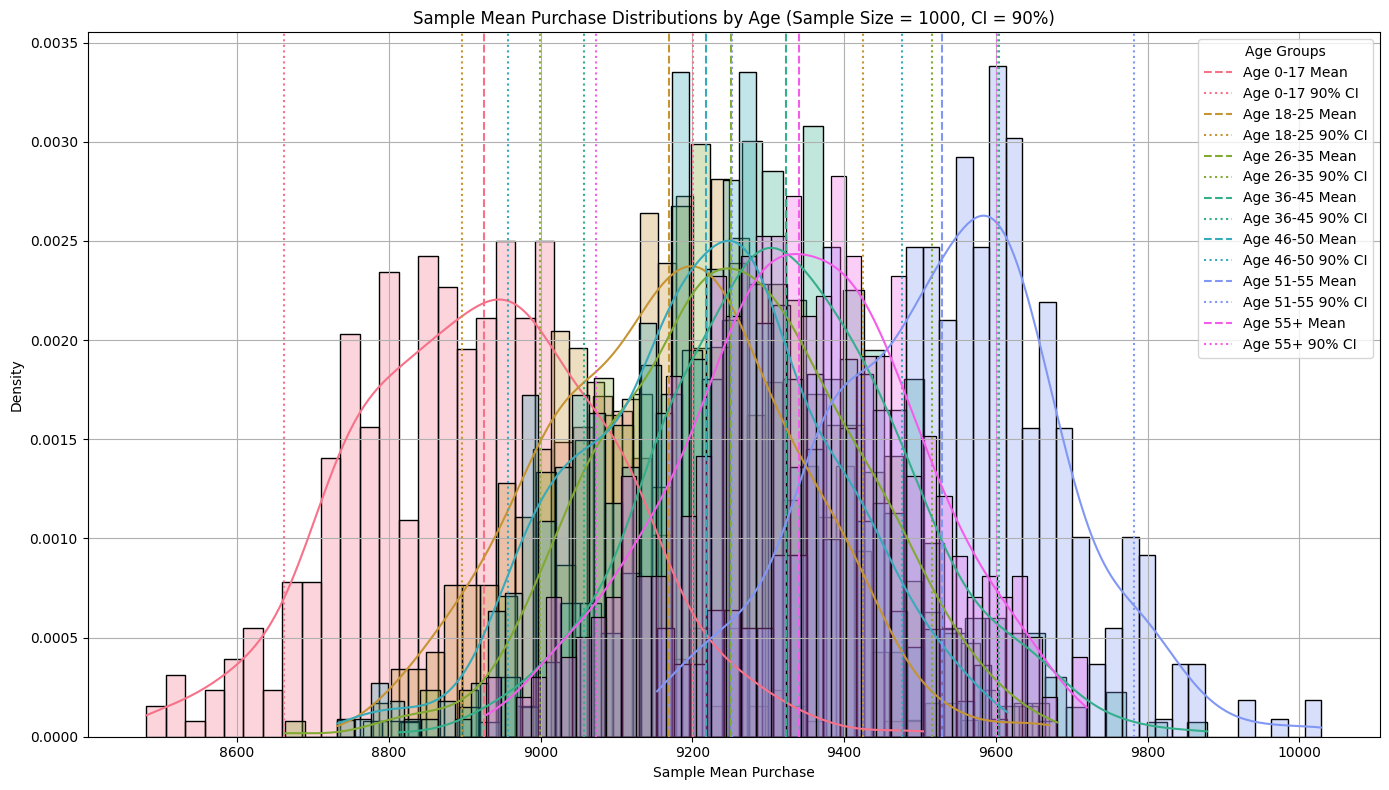

In [95]:
plot_agewise_purchase_distribution(df, sample_size=1000, confidence_level=0.90)

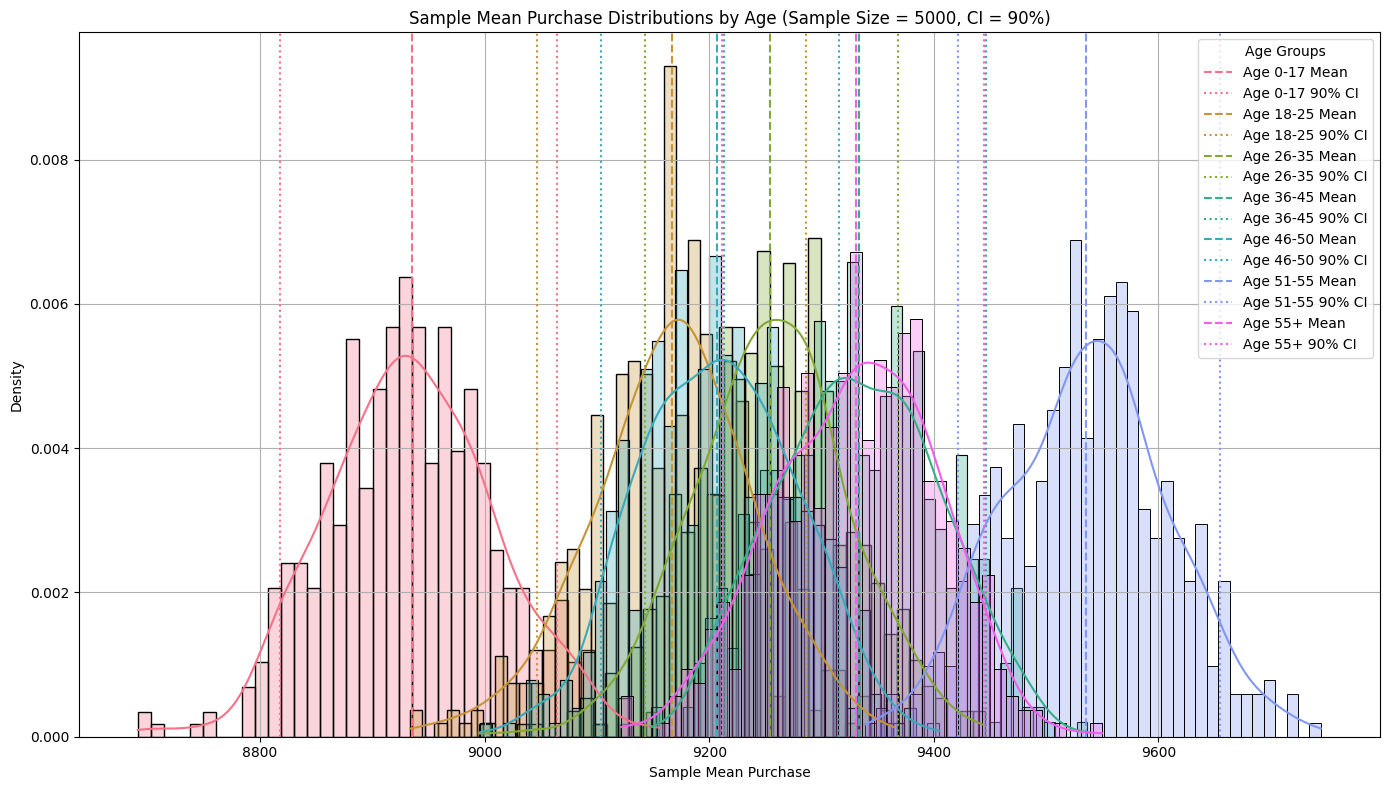

In [96]:
plot_agewise_purchase_distribution(df, sample_size=5000, confidence_level=0.90)

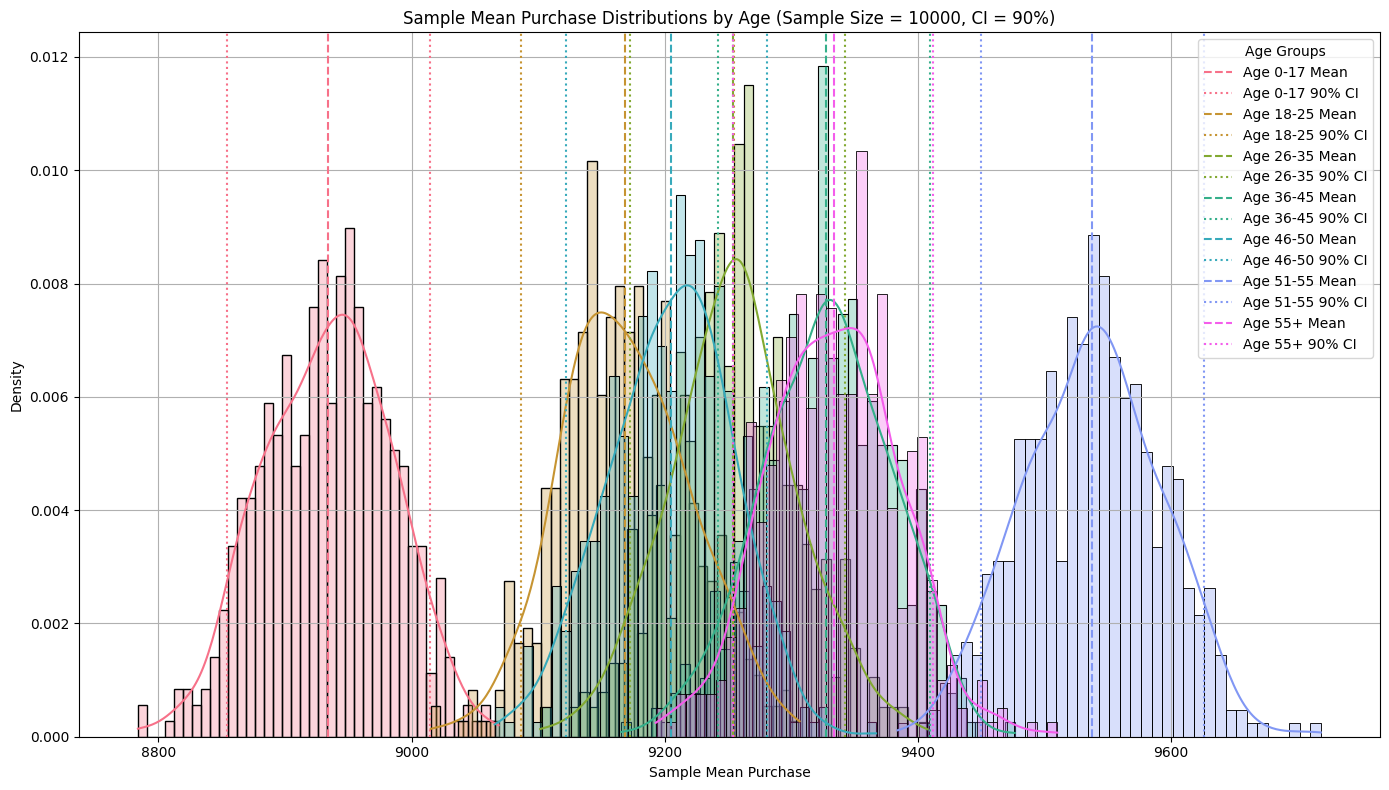

In [97]:
plot_agewise_purchase_distribution(df, sample_size=10000, confidence_level=0.90)

**Effect of sample size on confidence interval = 90%:**

*  Sample Size = 1000
The confidence intervals are wide, meaning there's more uncertainty in the average purchase.

Most age groups overlap, especially the middle ranges (like 18–25, 26–35, 36–45).

This makes it hard to tell which age group really spends more.

*  Sample Size = 5000
The intervals get tighter, so we’re more confident in the average estimates.

Overlaps still exist but are less than before.

Groups like 0–17 (lower spending) and 46–50 or 51–55 (higher spending) begin to stand out more clearly.

*  Sample Size = 10000
The intervals are now very narrow, and differences between age groups become clear.

Younger groups (like 0–17) show consistently lower average purchases.

Middle-aged groups (especially 26–45) show higher spending patterns.

The results are now reliable and meaningful.

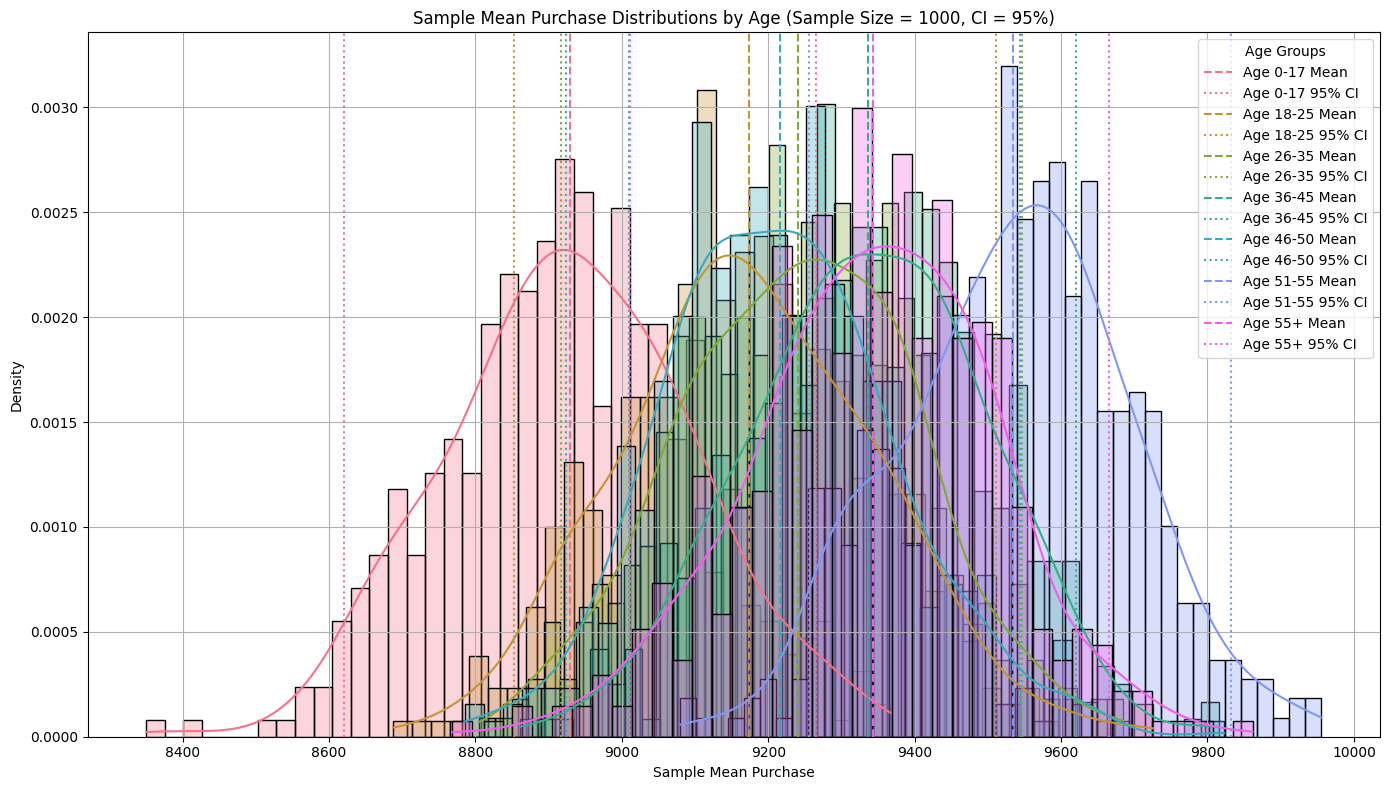

In [98]:
plot_agewise_purchase_distribution(df, sample_size=1000, confidence_level=0.95)

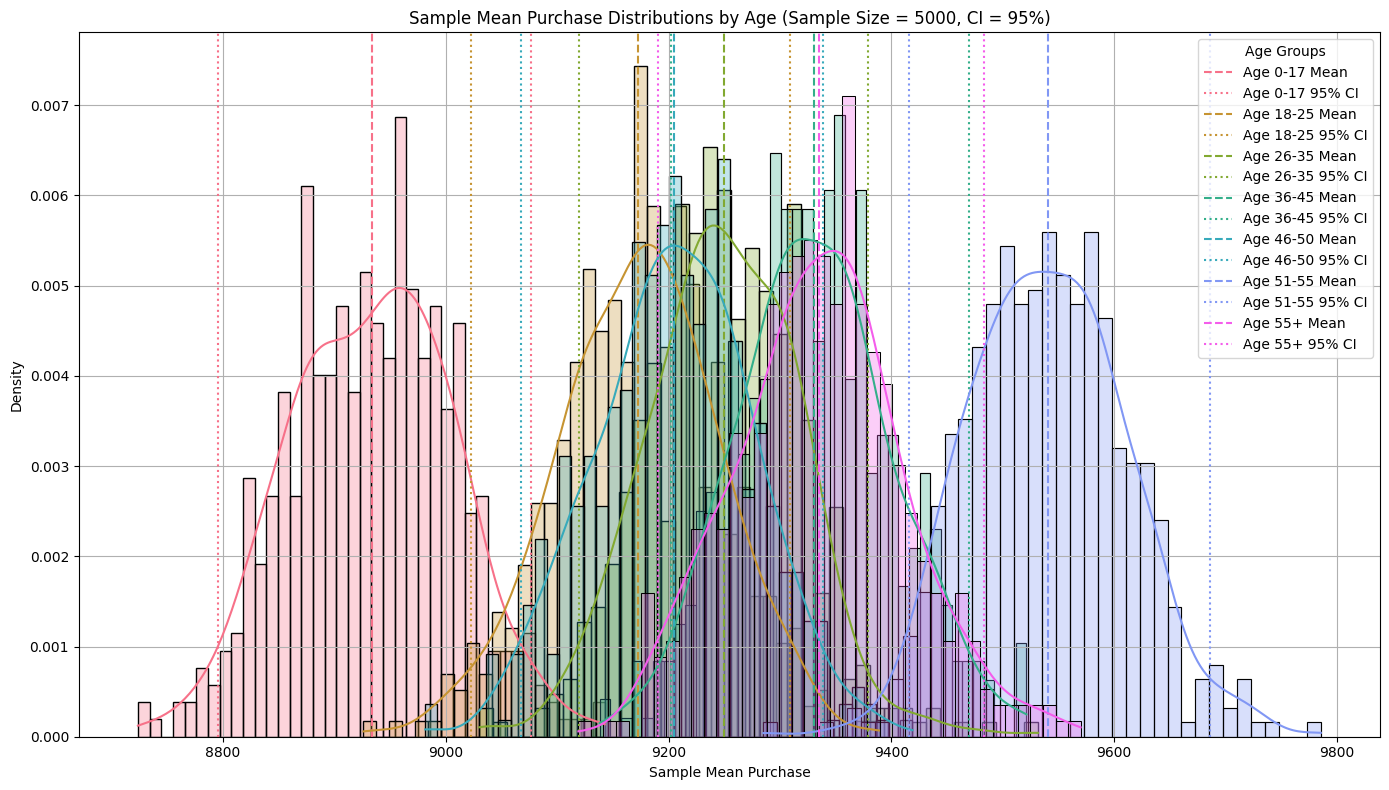

In [99]:
plot_agewise_purchase_distribution(df, sample_size=5000, confidence_level=0.95)

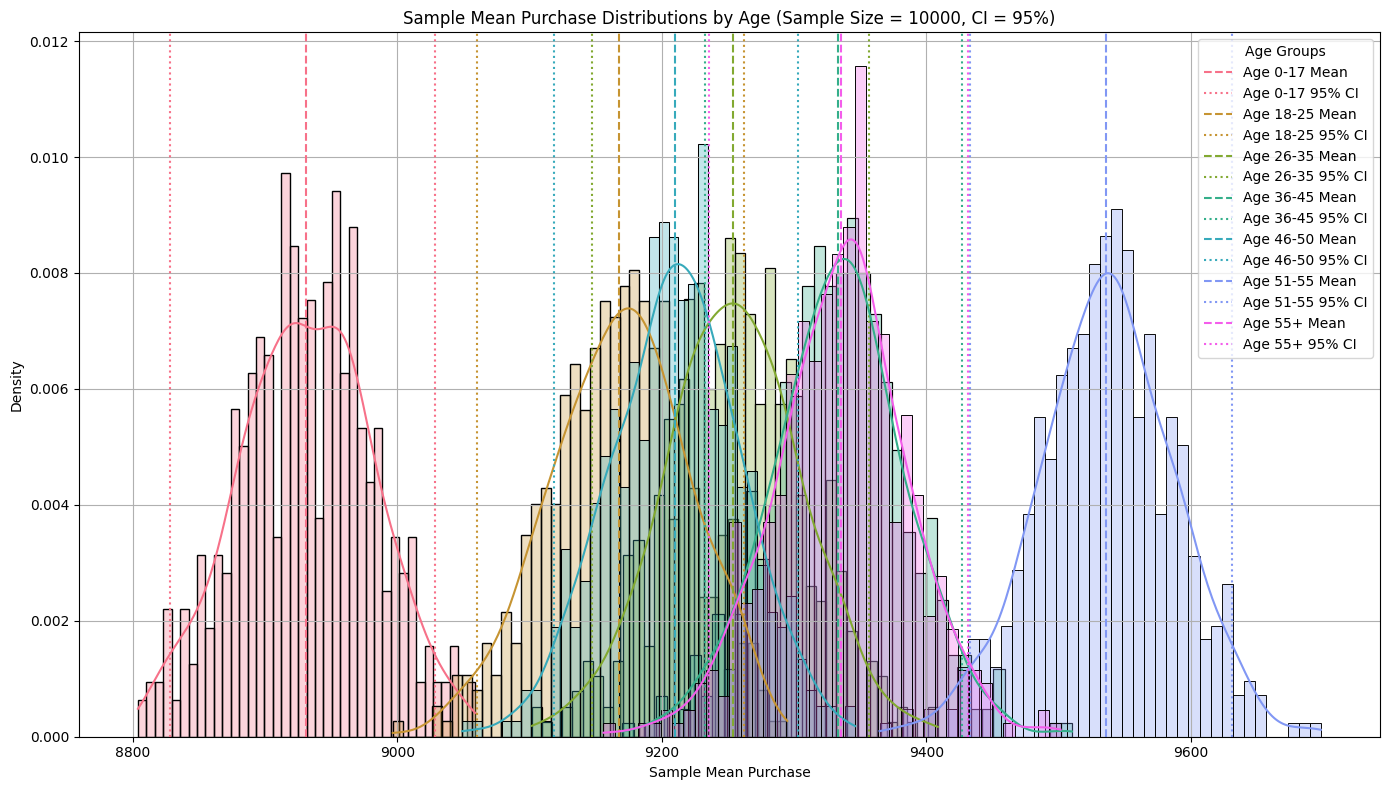

In [100]:
plot_agewise_purchase_distribution(df, sample_size=10000, confidence_level=0.95)

**Effect of sample size on confidence interval = 95%:**

*  Sample Size = 1000
The confidence intervals are fairly wide.

There is a lot of overlap between age groups — especially among the middle age bands (18–25, 26–35, 36–45).

It's difficult to say clearly which age group spends the most.

*  Sample Size = 5000
The confidence intervals become narrower, giving more accurate estimates.

Some separation starts to appear:

0–17 group continues to show lower spending.

26–35 and 36–45 groups show moderate to higher spending.

But some overlap between neighboring age groups still exists.

*  Sample Size = 10000
The intervals are now tight and clear.

Age-wise spending patterns are more visible:

26–45 age group shows highest average spending.

0–17 and 55+ consistently show lower average purchases.

The results at this point are very reliable and show real differences in behavior.

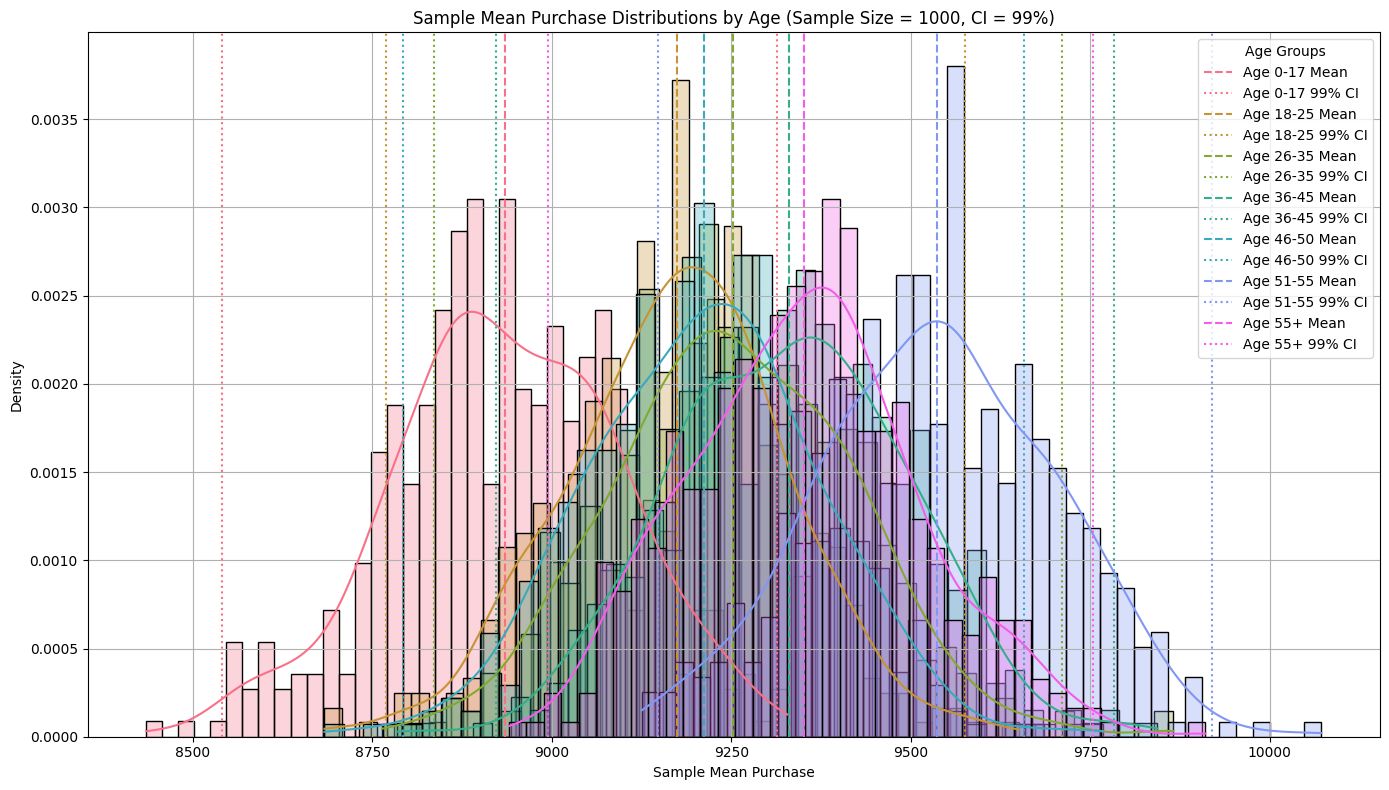

In [101]:
plot_agewise_purchase_distribution(df, sample_size=1000, confidence_level=0.99)

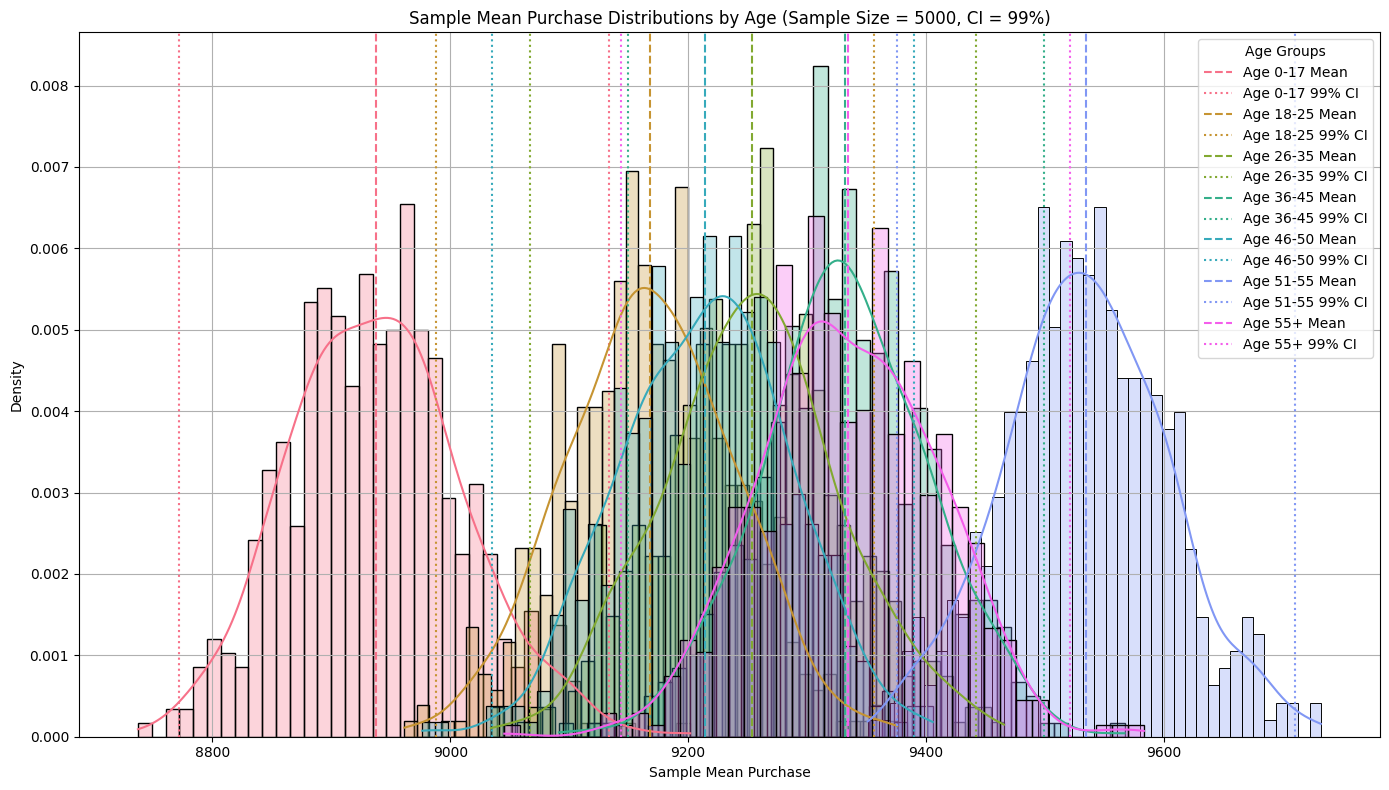

In [102]:
plot_agewise_purchase_distribution(df, sample_size=5000, confidence_level=0.99)

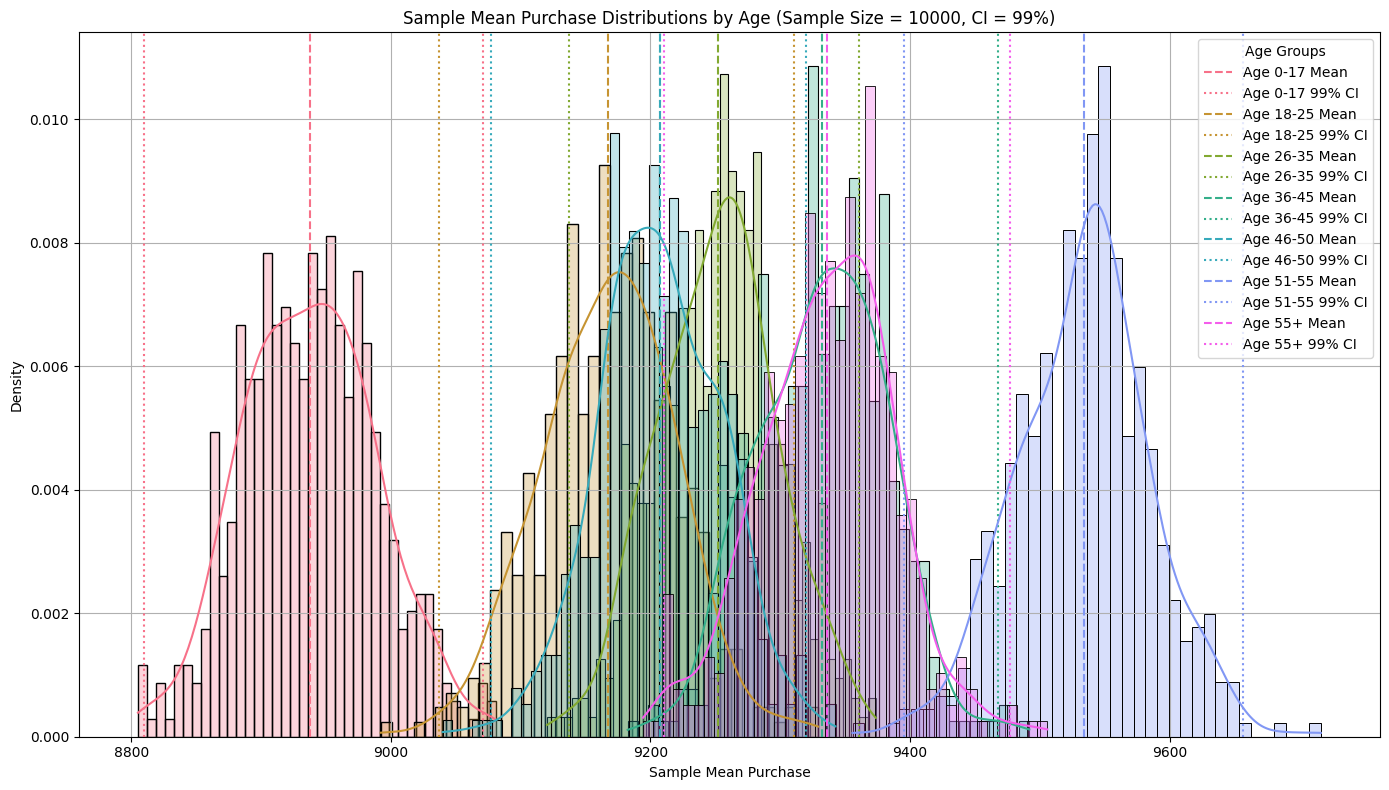

In [103]:
plot_agewise_purchase_distribution(df, sample_size=10000, confidence_level=0.99)

**Effect of sample size on confidence interval = 99%**

*  Sample Size = 1000

The confidence intervals are quite wide.

Many age groups overlap, especially the mid-range ages (18–45).

It’s hard to tell clearly which group spends more.

The 0–17 age group tends to appear on the lower end.

*  Sample Size = 5000

Intervals are now narrower, so the estimates are more reliable.

Some groups start to show distinct average spending patterns.

Younger and older age groups (like 0–17 and 55+) are visibly lower in spending than middle-aged groups.

*  Sample Size = 10000

Confidence intervals are very tight and show clear separation.

Spending patterns are now consistent and trustworthy.

Age groups 26–45 stand out as the ones with higher purchase averages, while 0–17 and 55+ continue to show lower spending.

**Conclusion:**

Larger sample sizes always lead to more accurate and narrower confidence intervals.

At 90% confidence, intervals are narrower but may miss true variation.

95% confidence gives a good balance of accuracy and reliability — widely used in practice.

99% confidence gives strongest certainty, but needs large samples to clearly show group differences.

With higher sample sizes (like 10,000), Walmart can confidently understand spending behavior by age group and make better business decisions.

**How can Walmart leverage this conclusion to make changes or improvements?**
*   Offer youth discounts or combo offers for age group 0–17 to increase their basket value.
*   Provide premium product bundles or loyalty points for 36–55 and 55+, as they already spend more.
*   Use personalized advertising message like,
    *  For 18–25: Focus on fashion, electronics, and value-for-money.
    *  For 55+: Promote home, healthcare, and lifestyle comfort products.
    *   Walmart can focus on special campaigns for them, like back-to-school offers or gift cards for parents.
*   Walmart can use more personalized promotions based on things like income, family size, or lifestyle for this group.
*   Arrange shelves to focus on products popular with high-spending age groups.
*   Create store areas that suit different age groups, like tech kiosks for young people and comfy sections for older customers.


# **Q7. Give recommendations and action items to Walmart.**

**Key observations from the analysis:**

*   Male customers spend slightly more than female customers on average, based on sample statistics and confidence intervals.

*   However, the confidence intervals for male and female purchase amounts overlap, meaning the difference may not be statistically significant at high confidence levels (95% or 99%).

*   Age group plays a more important role than gender — especially:

    *   Age 26–45 shows the highest spending

    *   Age 0–17 and 55+ show lower spending

*   Male customers show more variation in purchase amounts, indicating opportunities for targeting high-value male segments.

*   When stratified by both gender and age, male 26–35 and female 36–45 may be among the highest spenders.

**Recommendations:**
*   Create gender-specific ads and bundled deals
*   Analyze further which product types are favored by women (e.g., home goods, apparel) vs. men (e.g., electronics, sports)
*   Recommend products based on prior purchases, filtered by gender and age
*    Target High-Spending Age Segments (26–45) like,
      *   Focus marketing efforts (emails, mobile ads, loyalty offers) on these customers
      *   Tailor offers during key sales like Black Friday to their preferences




**Action Items:**
*   The Data Team should quickly make clear charts showing how much men and women of different ages spend. This will help Walmart understand who their best customers are.
*   The Marketing Team should try out different offers for men and women during the next big sale. This will help them see what kind of offers work best for each group.
*   The Product Team should look at what men and women bought in the past, they should group those products and create special deals based on what each group likes.
*   The Stock Team should plan what and how much to keep in stores based on what men and women usually buy.
